## Load libraries

In [2]:
library(tidyverse)
library(tibbletime)
library(anomalize)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.3.0
✔ tibble  2.0.1     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘tibbletime’

The following object is masked from ‘package:stats’:

    filter


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



## Load the Data

In [5]:
tb_all = read_csv("../../output/NYCHA_TS.csv")
# tb_all = select(tb_all, c('Building_Meter', 'Month', 'Imputed_KWH'))

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  Building_Meter = col_character(),
  Month = col_date(format = ""),
  Month_Type = col_character(),
  `Month_#_Days` = col_double(),
  Prorated_Days = col_double(),
  Gap_Days = col_double(),
  Gap_Type = col_character(),
  Prorated_KWH = col_double(),
  Imputed_KWH = col_double()
)


In [6]:
dim(tb_all)

[1] 209261     10

In [8]:
head(tb_all)

X1 Building_Meter          Month      Month_Type          Month_#_Days
1 0  165.0 - BLD 04_99273488 2009-12-01 First_Month         31          
2 1  165.0 - BLD 04_99273488 2010-01-01 Month_In_The_Middle 31          
3 2  165.0 - BLD 04_99273488 2010-02-01 Month_In_The_Middle 28          
4 3  165.0 - BLD 04_99273488 2010-03-01 Month_In_The_Middle 31          
5 4  165.0 - BLD 04_99273488 2010-04-01 Month_In_The_Middle 30          
6 5  165.0 - BLD 04_99273488 2010-05-01 Month_In_The_Middle 31          
  Prorated_Days Gap_Days Gap_Type Prorated_KWH Imputed_KWH
1  9            0        No Gap   19694.12     67835.29   
2 31            0        No Gap   68283.03     68283.03   
3 28            0        No Gap   61071.13     61071.13   
4 31            0        No Gap   58011.12     58011.12   
5 30            0        No Gap   55164.05     55164.05   
6 31            0        No Gap   58416.55     58416.55

## Explor Missing Values per account

In [6]:
# tb <- na_if(tb, 0)

accounts = tb_all %>% group_by(Building_Meter) 
# accounts <- accounts %>% summarise(counts = n(), na_counts = sum(is.na(Imputed_KWH)))
accounts <- accounts %>% summarise(counts = n(), na_counts = sum(Imputed_KWH == 0))
accounts <- filter(accounts, counts - na_counts >= 50)
accounts <- mutate(accounts, na_perc = na_counts/counts)

dim(accounts)

[1] 1916    4

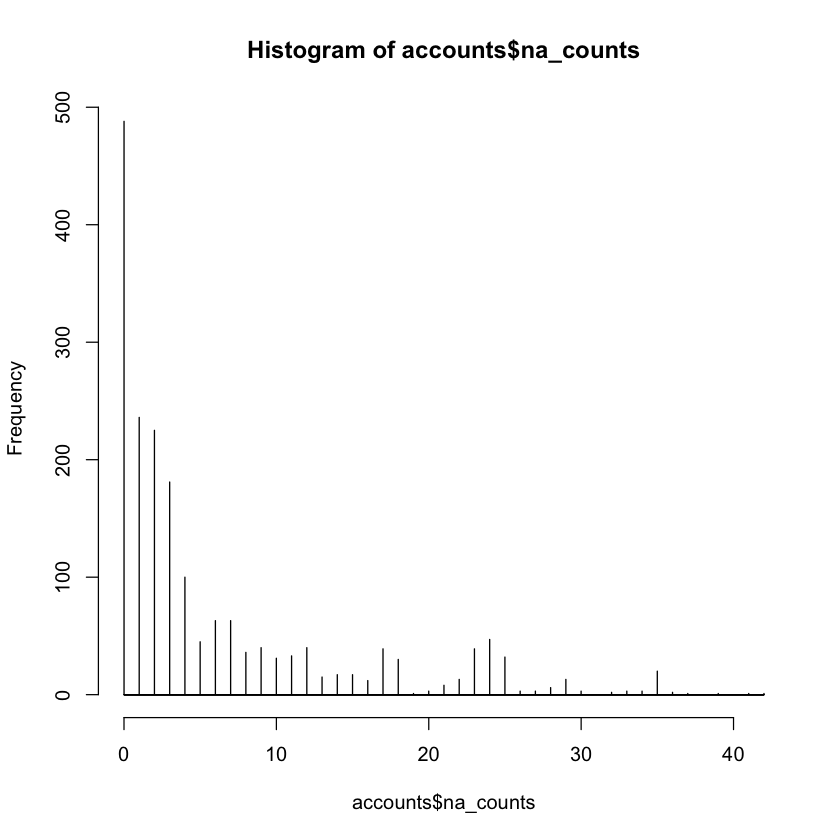

In [8]:
hist(accounts$na_counts, breaks = 10000)

In [9]:
data.frame(accounts)

Building_Meter                            counts na_counts na_perc    
1    1.0 - BLD 01_7836716                      103    13        0.126213592
2    1.0 - BLD 01_7838586                      103    16        0.155339806
3    1.0 - BLD 02_7694040                      103    13        0.126213592
4    1.0 - BLD 03_7177432                      103    14        0.135922330
5    1.0 - BLD 04_7381828                      103    13        0.126213592
6    1.0 - BLD 05_6889487                      103    13        0.126213592
7    1.0 - BLD 06_6469176                      103    13        0.126213592
8    1.0 - BLD 07_7006908                       73     1        0.013698630
9    10.0 - BLD 01_7864550                     102     2        0.019607843
10   10.0 - BLD 02_7864551                     102     2        0.019607843
11   10.0 - BLD 03_8010023                     102     2        0.019607843
12   10.0 - BLD 04_7864536                     102     2        0.019607843
13   10.0 - BLD 05_8163877                     101    23        0.227722772
14   10.0 - BLD 06_8163892                      99    20        0.202020202
15   10.0 - BLD 07_8010032                     102     2        0.019607843
16   10.0 - BLD 08_7864549                     102     2        0.019607843
17   10.0 - BLD 09_8125376                     102     5        0.049019608
18   10.0 - BLD 10_8010020                     102     2        0.019607843
19   10.0 - BLD 11_7864545                     102     3        0.029411765
20   10.0 - BLD 13_8301063                     102     5        0.049019608
21   10.0 - BLD 14_8301067                     102     2        0.019607843
22   10.0 - BLD 15_7864540                     102     3        0.029411765
23   10.0 - BLD 16_7864543                     102     2        0.019607843
24   10.0 - BLD 16_8163879                     100    26        0.260000000
25   100.0 - BLD 01_7250288                    103     1        0.009708738
26   100.0 - BLD 02_6458115                    103     1        0.009708738
27   100.0 - BLD 03 - Community Center_5537272  72     1        0.013888889
28   101.0 - BLD 02_7834072                    103     1        0.009708738
29   101.0 - BLD 04_7421675                    103     0        0.000000000
30   102.0 - BLD 02_8107087                    102     0        0.000000000
⋮    ⋮                                         ⋮      ⋮         ⋮          
1887 93.0 - BLD 06_8075321                     103     0        0.000000000
1888 96.0 - BLD 01_5922430                     103     8        0.077669903
1889 96.0 - BLD 02_8802096                     103     7        0.067961165
1890 96.0 - BLD 03_8072599                      98     0        0.000000000
1891 96.0 - BLD 04_6867055                     103     3        0.029126214
1892 96.0 - BLD 05_5922332                     102     2        0.019607843
1893 96.0 - BLD 06_8072600                     103     0        0.000000000
1894 96.0 - BLD 07_7719186                     103     6        0.058252427
1895 96.0 - BLD 08_5922010                     103    10        0.097087379
1896 97.0 - BLD 01_6689046                     103     2        0.019417476
1897 97.0 - BLD 02_6647840                     103     2        0.019417476
1898 97.0 - BLD 03_8205892                      76     0        0.000000000
1899 97.0 - BLD 04_6623223                     103     4        0.038834951
1900 97.0 - BLD 05_6852189                     103     1        0.009708738
1901 97.0 - BLD 09_6458213                     103     2        0.019417476
1902 97.0 - BLD 09_6852169                      95     8        0.084210526
1903 97.0 - BLD 10 - Community Center_7294308   98     1        0.010204082
1904 97.0 - BLD 10 - Community Center_7694984  103     3        0.029126214
1905 98.0 - BLD 14_99800010                     58     5        0.086206897
1906 98.0 - BLD 15_99275963                    102    28        0.274509804
1907 98.0 - BLD 15_99277502                    102   

In [152]:
# write.table(accounts$Building_Meter, file = "../../output/NYCHA_Accounts_More_Than_50_Months.csv")

In [10]:
# df = read.csv("../../output/NYCHA_Accounts_More_Than_50_Months.csv")

# head(df)

## Explore the Anomalize package

#### plotting configuration for the flagged anomalies

In [7]:
# ploting function for anomaly plots
ggsetup <- function(data) {
    data %>%
        ggplot(aes(rank, value, color = outlier)) +
        geom_point() +
        geom_line(aes(y = limit_upper), color = "red", linetype = 2) +
        geom_line(aes(y = limit_lower), color = "red", linetype = 2) +
        geom_text(aes(label = index), vjust = -1.25) +
        theme_bw() +
        scale_color_manual(values = c("No" = "#2c3e50", "Yes" = "#e31a1c")) +
        expand_limits(y = 13) +
        theme(legend.position = "bottom")
}

### Example 1 - Account with no missing data

#### Method 1: STL + IQR

In [8]:
ts =  select(filter(tb_all, Building_Meter == '165.0 - BLD 03_90327795'), 'Building_Meter', 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, method = "STL", merge = TRUE) %>%
    anomalize(remainder, method = 'iqr', alpha = 0.05) %>%
    time_recompose()

# ts_anomalized %>% glimpse()

ts_anomalized$Month_Value = format(ts_anomalized$Month,"%m")

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months


#### Plot the decomposed results with outliers

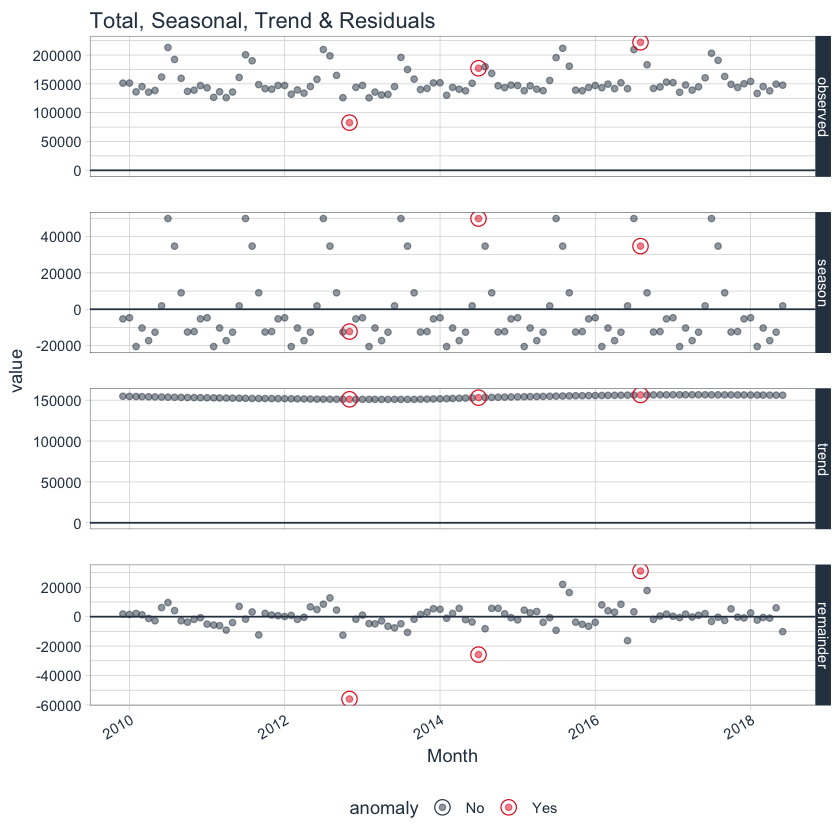

In [9]:
p1 <- ts_anomalized %>%
    plot_anomaly_decomposition(alpha_dot = 0.5) +
    ggtitle("Total, Seasonal, Trend & Residuals") 
p1

#### Plot the anomalies by its rank of deviation

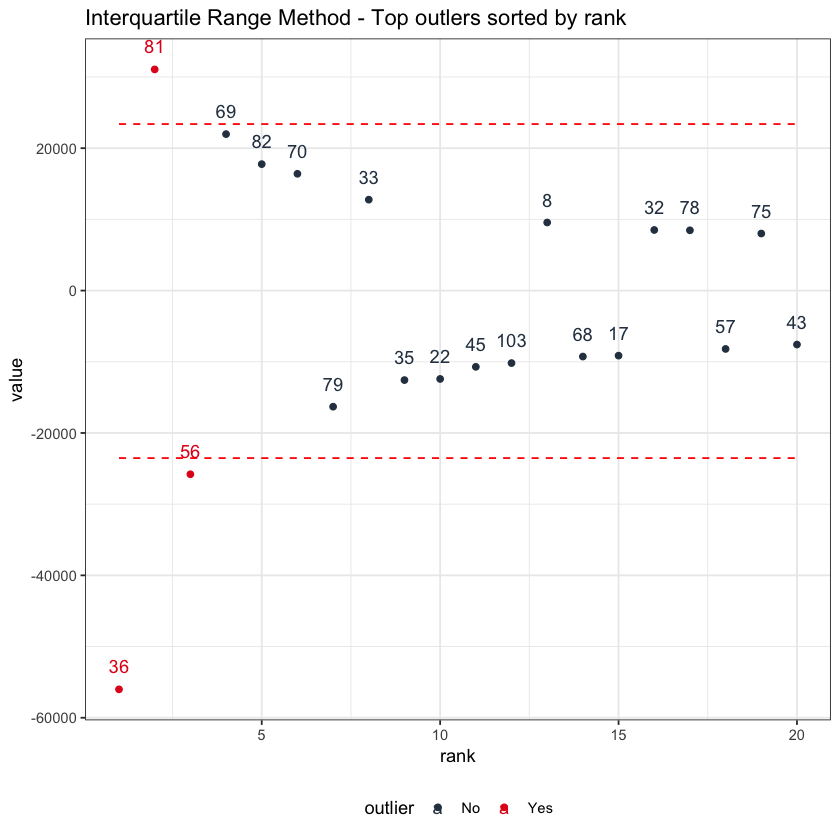

In [10]:
outliers <- iqr(ts_anomalized$remainder, verbose = TRUE)$outlier_report
outliers %>% 
    ggsetup() +
    ggtitle("Interquartile Range Method - Top outlers sorted by rank") 

In [12]:
a <- ts_anomalized[filter(outliers, outlier == 'Yes')$index, c(1,2,4,6,5,7,8,9)]

a <- rename(a, Calendar_Month = Month, Total = observed, Trend = trend, Seasonal = season
       , Residual = remainder, Residual_Lower_Limit = remainder_l1, Residual_Upper_Limit = remainder_l2)

a

Building_Meter          Calendar_Month Total    Trend    Seasonal  Residual 
1 165.0 - BLD 03_90327795 2012-11-01      82710.3 150984.3 -12265.34 -56008.64
2 165.0 - BLD 03_90327795 2016-08-01     222030.0 156279.1  34686.26  31064.60
3 165.0 - BLD 03_90327795 2014-07-01     177073.8 153031.5  49841.16 -25798.86
  Residual_Lower_Limit Residual_Upper_Limit
1 -23528               23388.25            
2 -23528               23388.25            
3 -23528               23388.25

In [13]:
a[, c(1,2,3,4,5,6)]

Building_Meter          Calendar_Month Total    Trend    Seasonal  Residual 
1 165.0 - BLD 03_90327795 2012-11-01      82710.3 150984.3 -12265.34 -56008.64
2 165.0 - BLD 03_90327795 2016-08-01     222030.0 156279.1  34686.26  31064.60
3 165.0 - BLD 03_90327795 2014-07-01     177073.8 153031.5  49841.16 -25798.86

#### Method 2: Twitter + GESD

In [271]:
ts =  select(filter(tb_all, Building_Meter == '165.0 - BLD 03_90327795'), 'Building_Meter', 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, method = "twitter", merge = TRUE) %>%
    anomalize(remainder, method = 'gesd') %>%
    time_recompose()

# ts_anomalized %>% glimpse()

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months


The Twitter decomposition method returns more outilers than the original STL method.

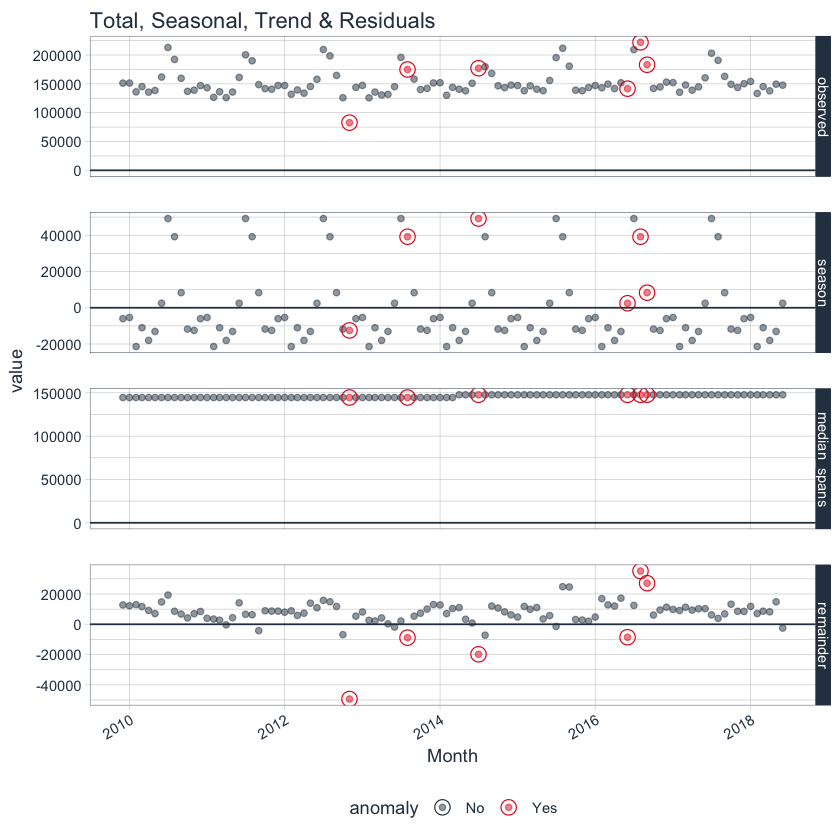

In [272]:
p1 <- ts_anomalized %>%
    plot_anomaly_decomposition(alpha_dot = 0.5) +
    ggtitle("Total, Seasonal, Trend & Residuals") 

p1

#### Plot the anomalies by its rank of deviation

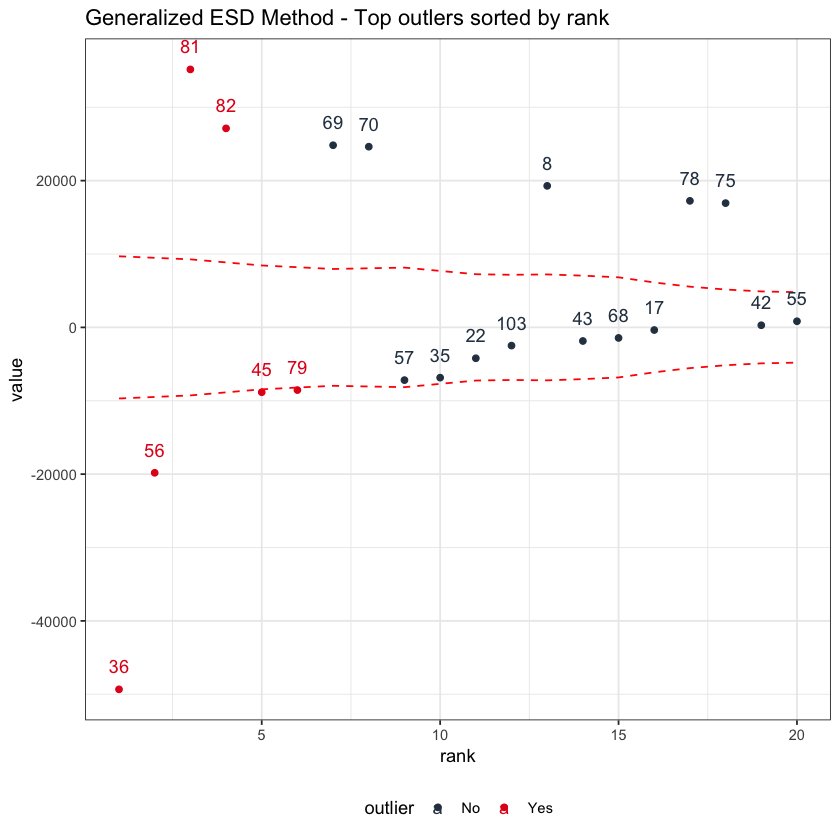

In [277]:
outliers <- gesd(ts_anomalized$remainder, alpha = 0.05,  verbose = TRUE)$outlier_report
outliers %>% 
    ggsetup() +
    ggtitle("Generalized ESD Method - Top outlers sorted by rank") 

In [37]:
b <- ts_anomalized[filter(outliers, outlier == 'Yes')$index, c(1,2,4,6,5,7)]

b <- rename(b, Calendar_Month = Month, Total = observed, Trend = median_spans, Seasonal = season, Residual = remainder)

In [39]:
b[c(1,3,4,2,5,6),]

Building_Meter          Calendar_Month Total    Trend    Seasonal  
1 165.0 - BLD 03_90327795 2012-11-01      82710.3 144548.5 -12508.822
2 165.0 - BLD 03_90327795 2016-08-01     222030.0 147692.3  39178.342
3 165.0 - BLD 03_90327795 2016-09-01     183134.8 147692.3   8316.164
4 165.0 - BLD 03_90327795 2014-07-01     177073.8 147692.3  49199.121
5 165.0 - BLD 03_90327795 2013-08-01     174890.0 144548.5  39178.342
6 165.0 - BLD 03_90327795 2016-06-01     141632.4 147692.3   2482.649
  Residual  
1 -49329.365
2  35159.351
3  27126.328
4 -19817.651
5  -8836.832
6  -8542.575

## Questions:

- Why does the GESD test return outliers in this order? 
- Does the Anomalize package implemented the GESD test as suggested in the Twitter paper, using MAD instead of Median?

### Method 3: XmR chart

In [41]:
tb =  select(filter(tb_all, Building_Meter == '165.0 - BLD 03_90327795'), 'Month', 'Imputed_KWH')

In [42]:
ts_anomalized <- tb %>%
  time_decompose(Imputed_KWH, method = "STL", merge = TRUE)
ts_anomalized <- rename(ts_anomalized, Residual = remainder)


Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months


In [43]:
library(ggQC)
library(gridExtra)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



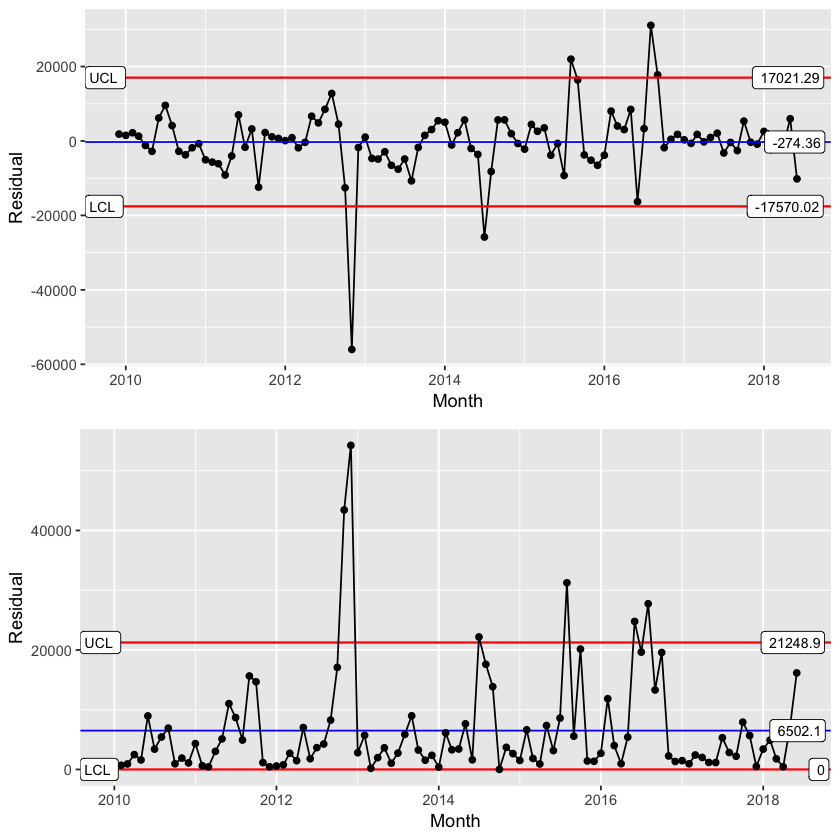

In [44]:
x_Plot <- ggplot(ts_anomalized, aes(x = Month, y = Residual)) + geom_point() + geom_line() + 
  stat_QC(method = 'XmR', auto.label = T, label.digits = 2, show.1n2.sigma = F) 

mR_Plot <- ggplot(ts_anomalized, aes(x = Month, y = Residual)) + stat_mR() + stat_QC_labels(method="mR")

grid.arrange(x_Plot, mR_Plot, nrow=2)

In [45]:
# summarize the control limits
ctrl_limits <- QC_Lines(data = ts_anomalized$Residual, method = "XmR")     
ts_anomalized <- cbind(ts_anomalized, ctrl_limits)

cal_dev <- function(x) {
  if (x$Residual < x$xBar_one_LCL) {
    return(x$xBar_one_LCL - x$Residual)
  } else if (x$Residual > x$xBar_one_UCL) {
    return(x$Residual - x$xBar_one_UCL)
  } else {
    return (NA)
  }
}

In [46]:
dev <- rep(NA, nrow(ts_anomalized))
for (i in 1:nrow(ts_anomalized)) {
  dev[[i]] <- cal_dev(ts_anomalized[i, ])
}
ts_anomalized$Dev = dev

In [47]:
ts_anomalized

Month      Imputed_KWH observed season     trend    Residual   
1   2009-12-01 151280.0    151280.0  -5292.352 154728.3   1844.0475
2   2010-01-01 151382.9    151382.9  -4686.829 154562.4   1507.2546
3   2010-02-01 136106.8    136106.8 -20499.522 154396.6   2209.7613
4   2010-03-01 145211.0    145211.0 -10309.362 154230.7   1289.6268
5   2010-04-01 135622.2    135622.2 -17242.700 154064.8  -1199.9609
6   2010-05-01 138498.6    138498.6 -12610.265 153898.9  -2790.1010
7   2010-06-01 161783.7    161783.7   1854.312 153764.6   6164.7718
8   2010-07-01 213036.4    213036.4  49841.165 153630.2   9564.9892
9   2010-08-01 192317.3    192317.3  34686.263 153495.9   4135.1997
10  2010-09-01 159626.5    159626.5   9046.662 153361.5  -2781.6960
11  2010-10-01 136977.8    136977.8 -12522.027 153227.2  -3727.3477
12  2010-11-01 139021.9    139021.9 -12265.344 153112.9  -1825.6518
13  2010-12-01 146975.1    146975.1  -5292.352 152998.6   -731.1563
14  2011-01-01 143141.8    143141.8  -4686.829 152884.4  -5055.7416
15  2011-02-01 126586.2    126586.2 -20499.522 152770.1  -5684.4306
16  2011-03-01 136234.4    136234.4 -10309.362 152655.9  -6112.1651
17  2011-04-01 126160.7    126160.7 -17242.700 152542.3  -9138.8993
18  2011-05-01 135796.9    135796.9 -12610.265 152428.8  -4021.5783
19  2011-06-01 161168.0    161168.0   1854.312 152315.2   6998.4786
20  2011-07-01 200352.0    200352.0  49841.165 152201.7  -1690.8175
21  2011-08-01 190007.3    190007.3  34686.263 152088.1   3232.9138
22  2011-09-01 148657.6    148657.6   9046.662 152023.4 -12412.4885
23  2011-10-01 141700.9    141700.9 -12522.027 151958.7   2264.2458
24  2011-11-01 140744.9    140744.9 -12265.344 151894.0   1116.2647
25  2011-12-01 147209.4    147209.4  -5292.352 151829.2    672.5246
26  2012-01-01 147177.9    147177.9  -4686.829 151764.5    100.2353
27  2012-02-01 132037.1    132037.1 -20499.522 151656.9    879.7265
28  2012-03-01 139405.7    139405.7 -10309.362 151549.2  -1834.1527
29  2012-04-01 133832.6    133832.6 -17242.700 151441.5   -366.2006
30  2012-05-01 145377.8    145377.8 -12610.265 151333.9   6654.1588
⋮   ⋮          ⋮           ⋮        ⋮          ⋮        ⋮          
74  2016-01-01 147100.5    147100.5  -4686.829 155615.7  -3828.3620
75  2016-02-01 143223.7    143223.7 -20499.522 155708.3   8014.9756
76  2016-03-01 149510.1    149510.1 -10309.362 155800.8   4018.6826
77  2016-04-01 141709.8    141709.8 -17242.700 155896.4   3056.1004
78  2016-05-01 151849.7    151849.7 -12610.265 155992.1   8467.8451
79  2016-06-01 141632.4    141632.4   1854.312 156087.8 -16309.7218
80  2016-07-01 209354.3    209354.3  49841.165 156183.5   3329.6559
81  2016-08-01 222030.0    222030.0  34686.263 156279.1  31064.5979
82  2016-09-01 183134.8    183134.8   9046.662 156329.0  17759.1876
83  2016-10-01 142040.7    142040.7 -12522.027 156378.8  -1816.0186
84  2016-11-01 144606.2    144606.2 -12265.344 156428.6    443.0174
85  2016-12-01 152961.6    152961.6  -5292.352 156478.4   1775.5349
86  2017-01-01 152141.0    152141.0  -4686.829 156528.2    299.5842
87  2017-02-01 135375.7    135375.7 -20499.522 156523.2   -648.0017
88  2017-03-01 147980.3    147980.3 -10309.362 156518.3   1771.4280
89  2017-04-01 139034.5    139034.5 -17242.700 156513.3   -236.1369
90  2017-05-01 144836.7    144836.7 -12610.265 156508.4    938.6154
91  2017-06-01 160445.1    160445.1   1854.312 156503.4   2087.4150
92  2017-07-01 203093.3    203093.3  49841.165 156474.1  -3221.9491
93  2017-08-01 190745.0    190745.0  34686.263 156444.8   -386.0969
94  2017-09-01 162874.2    162874.2   9046.662 156415.5  -2588.0116
95  2017-10-01 149192.9    149192.9 -12522.027 156386.3   5328.6816
96  2017-11-01 143747.9    143747.9 -12265.344 156357.0   -343.7595
97  2017-12-01 150176.0    150176.0  -5292.352 156311.6   -843.2909
98  2018-01-01 154149.5    154149.5  -4686.829 156266.3   2570.0431
99  2018-02-01 133388.0    133388.0 -20499.522 156221.0  -2333.4104
100 2018-03-01 145315.4    145315.4 -10309.362 156175.6   -5

In [48]:
anomalies <- select(arrange(filter(ts_anomalized, !is.na(Dev)), desc(Dev)), c('Month', 'Imputed_KWH', 'trend', 'season', 'Residual'))
rename(anomalies, Total = Imputed_KWH, Trend = trend, Seasonal = season)

Month      Total    Trend    Seasonal   Residual 
1 2012-11-01  82710.3 150984.3 -12265.344 -56008.64
2 2016-08-01 222030.0 156279.1  34686.263  31064.60
3 2014-07-01 177073.8 153031.5  49841.165 -25798.86
4 2015-08-01 211696.2 155032.3  34686.263  21977.61
5 2016-09-01 183134.8 156329.0   9046.662  17759.19

### Adjust the max_anoms parameter

#### STL + IQR

#### cap the max_anoms

In [81]:
ts =  select(filter(tb, Building_Meter == '165.0 - BLD 03_90327795'), 'Building_Meter', 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, method = "STL", merge = TRUE) %>%
    anomalize(remainder, method = 'iqr', max_anoms = (sum(ts$Imputed_KWH == 0) + 2)/nrow(ts)) %>%
    time_recompose()

# ts_anomalized %>% glimpse()

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months


By specifying the max number of outliers allowed, we get exactly the amount of outliers specified. The algorithm returns data points that have the largest absolute deviations in the residual component. 

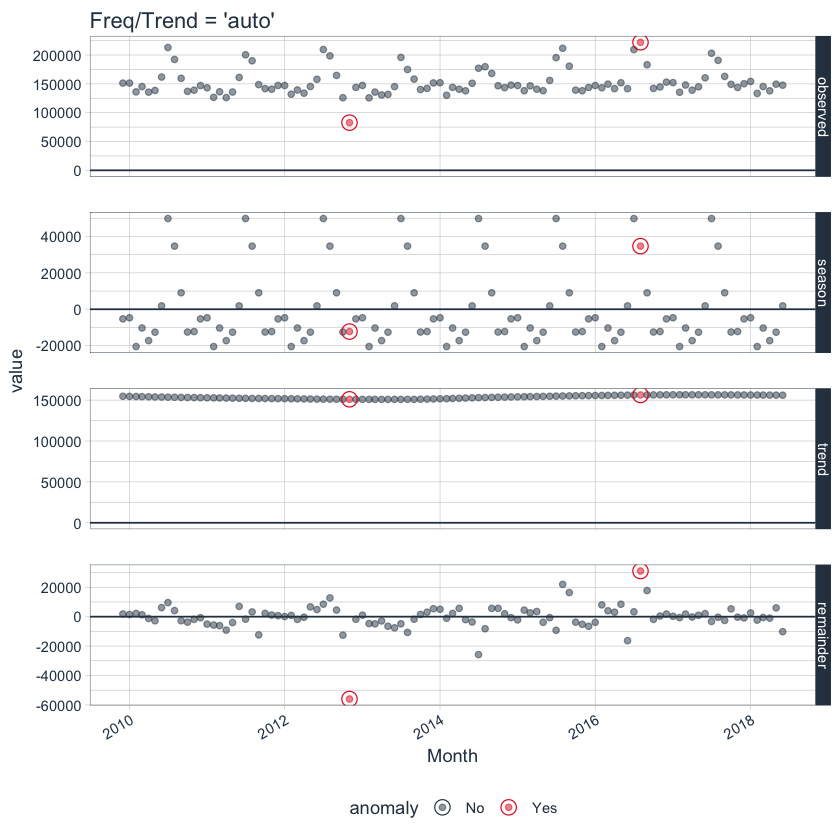

In [82]:
p1 <- ts_anomalized %>%
    plot_anomaly_decomposition(alpha_dot = 0.5) +
    ggtitle("Freq/Trend = 'auto'")

p1

#### adjust the factors multiplied by IQR

In [303]:
ts =  select(filter(tb_all, Building_Meter == '165.0 - BLD 03_90327795'), 'Building_Meter', 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, method = "STL", merge = TRUE) %>%
    anomalize(remainder, method = 'iqr', alpha = 0.025) %>%
    time_recompose()

# ts_anomalized %>% glimpse()

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months


By specifying the max number of outliers allowed, we get exactly the amount of outliers specified. The algorithm returns data points that have the largest absolute deviations in the residual component. 

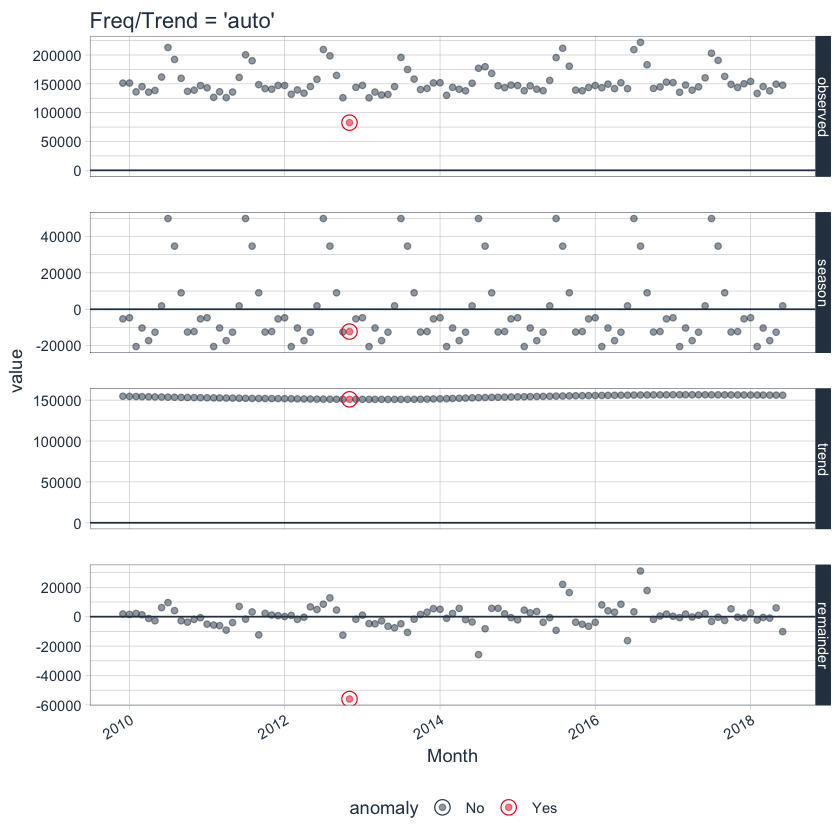

In [304]:
p1 <- ts_anomalized %>%
    plot_anomaly_decomposition(alpha_dot = 0.5) +
    ggtitle("Freq/Trend = 'auto'")

p1

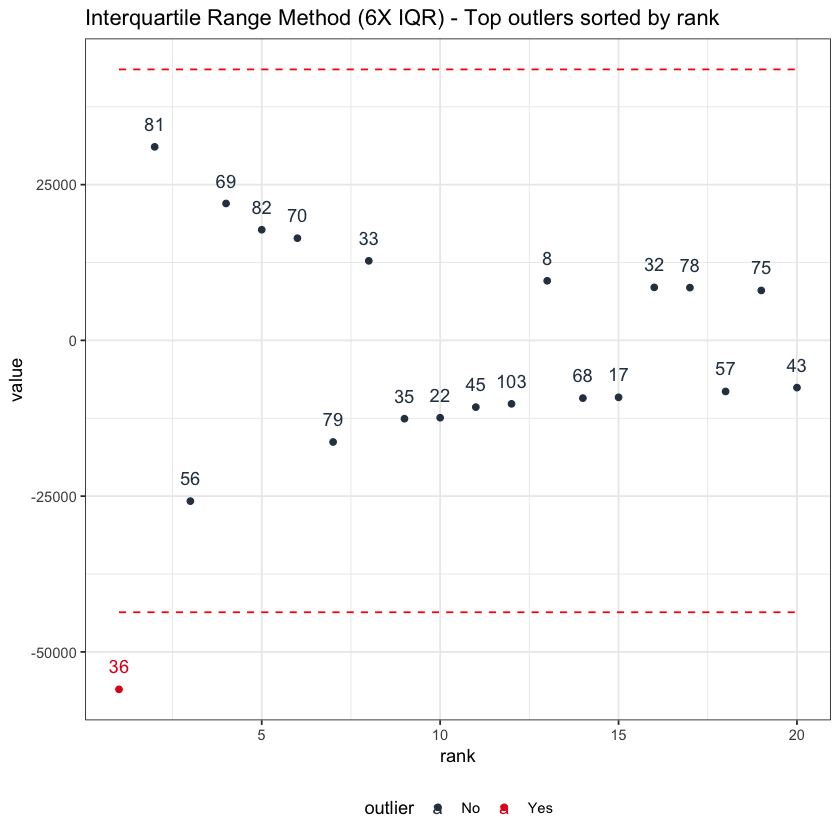

In [307]:
outliers <- iqr(ts_anomalized$remainder, verbose = TRUE, alpha = 0.025)$outlier_report
outliers %>% 
    ggsetup() +
    ggtitle("Interquartile Range Method (6X IQR) - Top outlers sorted by rank") 

### Example 2 - Account with three missing values in the middle

#### Method: STL + IQR

In [85]:
ts =  select(filter(tb, Building_Meter == '164.0 - BLD 01_96973681'), 'Building_Meter', 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, method = 'stl', merge = TRUE) %>%
    anomalize(remainder, method = 'iqr') %>%
    time_recompose()

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months


In [86]:
filter(ts_anomalized, anomaly == 'Yes')

Building_Meter          Month      Imputed_KWH observed      season     
1 164.0 - BLD 01_96973681 2012-11-01 64020.36     6.402036e+04  -3596.0013
2 164.0 - BLD 01_96973681 2013-01-01     0.00    -6.366463e-12    447.0866
3 164.0 - BLD 01_96973681 2013-02-01     0.00     1.818989e-12 -11446.9268
4 164.0 - BLD 01_96973681 2013-03-01     0.00     2.728484e-12  -5029.7667
  trend    remainder remainder_l1 remainder_l2 anomaly recomposed_l1
1 97378.53 -29762.17 -23658.08    23760.54     Yes     70124.45     
2 97336.85 -97783.94 -23658.08    23760.54     Yes     74125.86     
3 97316.01 -85869.08 -23658.08    23760.54     Yes     62211.00     
4 97295.17 -92265.40 -23658.08    23760.54     Yes     68607.32     
  recomposed_l2
1 117543.1     
2 121544.5     
3 109629.6     
4 116025.9

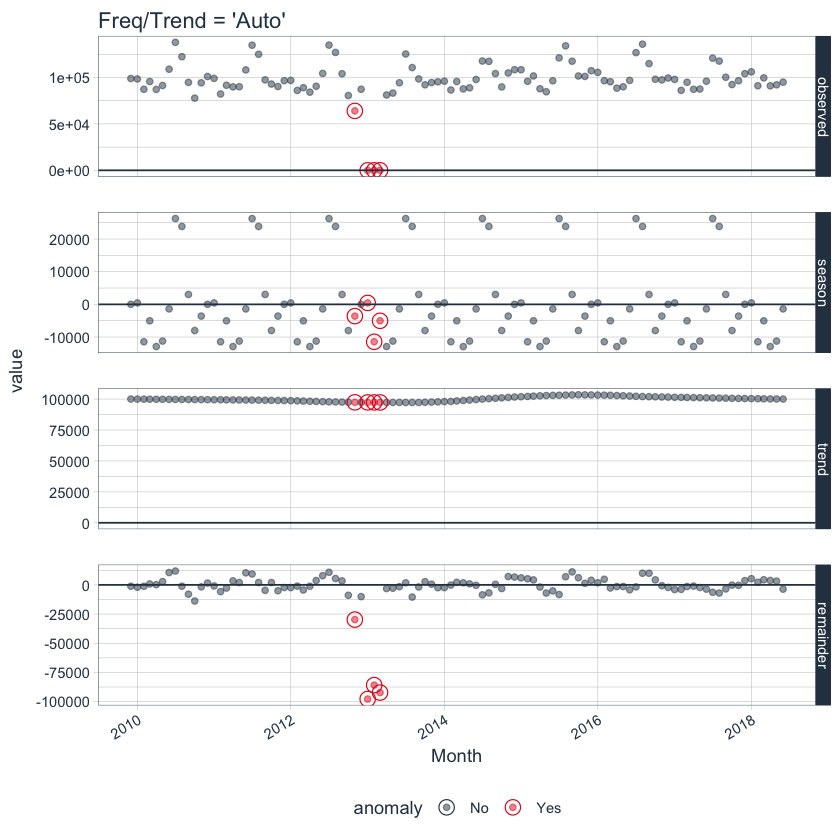

In [87]:
p1 <- ts_anomalized %>%
    plot_anomaly_decomposition(alpha_dot = 0.5) +
    ggtitle("Freq/Trend = 'Auto'")

p1

#### Method: Twitter + GESD

In [88]:
ts =  select(filter(tb, Building_Meter == '164.0 - BLD 01_96973681'), 'Building_Meter', 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, method = 'twitter', merge = TRUE) %>%
    anomalize(remainder, method = 'gesd') %>%
    time_recompose()

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months


In [89]:
filter(ts_anomalized, anomaly == 'Yes')

Building_Meter          Month      Imputed_KWH observed     season      
1 164.0 - BLD 01_96973681 2012-11-01 64020.36    6.402036e+04  -3732.39396
2 164.0 - BLD 01_96973681 2013-01-01     0.00    1.918465e-12     78.54968
3 164.0 - BLD 01_96973681 2013-02-01     0.00    1.818989e-12 -11921.57764
4 164.0 - BLD 01_96973681 2013-03-01     0.00    9.094947e-13  -5461.12432
  median_spans remainder remainder_l1 remainder_l2 anomaly recomposed_l1
1 94440        -26687.24 -12767.11    12767.11     Yes     77940.50     
2 94440        -94518.55 -12767.11    12767.11     Yes     81751.44     
3 94440        -82518.42 -12767.11    12767.11     Yes     69751.31     
4 94440        -88978.88 -12767.11    12767.11     Yes     76211.77     
  recomposed_l2
1 103474.71    
2 107285.66    
3  95285.53    
4 101745.98

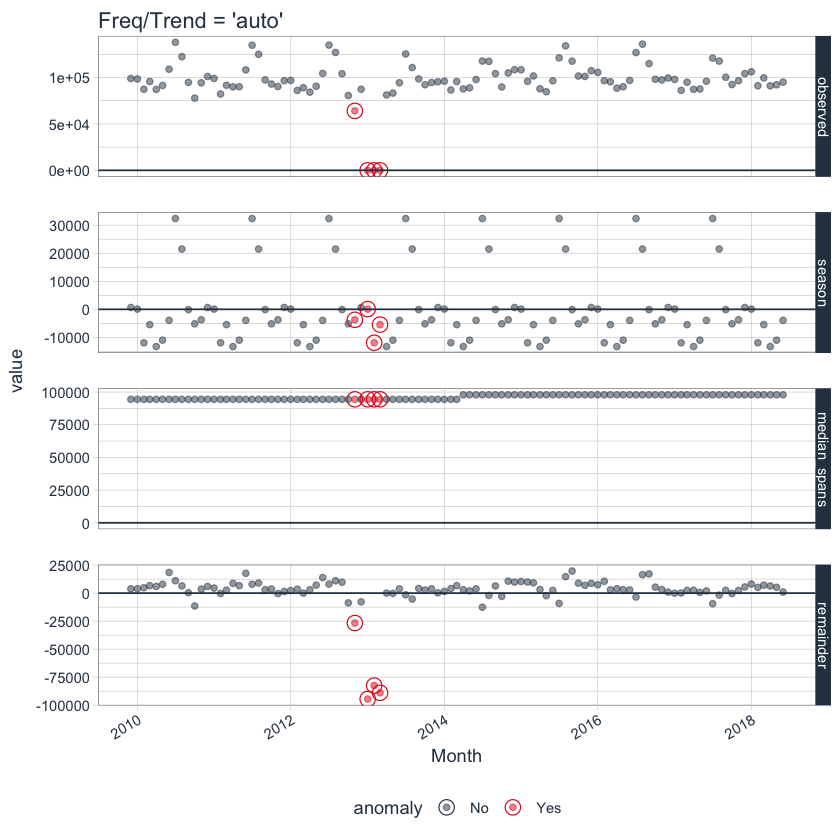

In [90]:
p1 <- ts_anomalized %>%
    plot_anomaly_decomposition(alpha_dot = 0.5) +
    ggtitle("Freq/Trend = 'auto'")

p1

## Loop through all accounts (with at least 50 months of data)

We can do the following parameters tuning for each account:
- Twitter vs. STL decomposition method
- IQR vs. GESD test on residuals
- max_anom for the upper limit of number of outliers
- others

For now, we just use the default setting and same parameter configurations for all accounts.

Only consider accounts with more than 50 months of data

In [95]:
accounts = tb_all %>% group_by(Building_Meter) %>% summarise(counts = n(), na_counts = sum(Imputed_KWH == 0))
accounts <- filter(accounts, counts - na_counts >= 50)
accounts <- mutate(accounts, na_perc = na_counts/counts)
dim(accounts)
summary(accounts$na_perc)

[1] 1916    4

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.02913 0.06762 0.09091 0.43750 

#### STL + IQR method

In [294]:
results_stl <- vector("list", length(accounts)) 

start.time <- Sys.time()

for (i in 1:length(accounts$Building_Meter)) {
# for (i in 1:2) {
    ts = select(filter(tb_all, Building_Meter == accounts$Building_Meter[[i]]), 'Month', 'Imputed_KWH')
    ts_anomalized <- ts %>%
        time_decompose(Imputed_KWH, merge = TRUE, method = 'stl') %>%
        anomalize(remainder, method = 'iqr', alpha = 0.025) %>%
        time_recompose()
    ts_anomalized$Account = accounts$Building_Meter[[i]]
    results_stl[[i]] <- ts_anomalized
}

end.time <- Sys.time()
time.taken.stl <- end.time - start.time

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 12 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 41 months
Converting

frequency = 12 months
trend = 41 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 37 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 26 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency 

frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 39 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 32 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 32 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency 

frequency = 12 months
trend = 38.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index 

trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 51 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 48

frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 51 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
freque

trend = 44 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 44 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 44 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 44 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 44 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 31.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 31.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 44 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend 

frequency = 12 months
trend = 25 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 50 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 25 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency 

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 28 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 18 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 18 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 18 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 18 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 18 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 18 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 18 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 18 months
Converting

frequency = 12 months
trend = 48 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 48 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 48 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 48 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 48 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 48 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 48 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 30 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 30 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency 

frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 49 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 48.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 50.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 50.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 12 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 50 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 41 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 41.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
fr

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 33 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 41 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 34 months
Converting

frequency = 12 months
trend = 50.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 50.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 47.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 41 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 41 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
freq

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 27 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 49 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 25 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting

frequency = 12 months
trend = 41 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 41 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 41 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency 

trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 50.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 51 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 50.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend 

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 month

frequency = 12 months
trend = 15 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 50 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency 

frequency = 12 months
trend = 46.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 46.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 25 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 41 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 41 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 29 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
freque

frequency = 12 months
trend = 37.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 37.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
freque

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 48.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 49 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converti

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 38.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 50.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Co

frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency 

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 39 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 39 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 39 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 31.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 31.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 39 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 39 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 39 months
Conver

frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 43 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 43 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 43 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 43 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency 

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 50 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 40 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 50 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 32 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 50 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 12 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 27 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 4 months
Converting 

In [295]:
for (i in 1:length(results_stl)) {
    results_stl[[i]]$missing_value = (results_stl[[i]]$Imputed_KWH == 0)
}

In [296]:
results_stl.025 <- results_stl

In [292]:
results_stl.05 <- results_stl

In [297]:
head(results_stl.025[[4]])

Month      Imputed_KWH observed season     trend    remainder  remainder_l1
1 2009-12-01 890.5455    890.5455  -28.77850 754.3065  165.01745 -1357.762   
2 2010-01-01 845.3818    845.3818   23.06097 756.0195   66.30138 -1357.762   
3 2010-02-01 586.5931    586.5931 -124.03329 757.7324  -47.10605 -1357.762   
4 2010-03-01 595.3682    595.3682  -44.52554 759.4454 -119.55168 -1357.762   
5 2010-04-01 551.2673    551.2673  -62.11459 761.1584 -147.77651 -1357.762   
6 2010-05-01 648.3714    648.3714   42.23191 762.8714 -156.73183 -1357.762   
  remainder_l2 anomaly recomposed_l1 recomposed_l2 Account             
1 1277.343     No      -632.2335     2002.871      1.0 - BLD 03_7177432
2 1277.343     No      -578.6811     2056.424      1.0 - BLD 03_7177432
3 1277.343     No      -724.0624     1911.043      1.0 - BLD 03_7177432
4 1277.343     No      -642.8416     1992.263      1.0 - BLD 03_7177432
5 1277.343     No      -658.7177     1976.387      1.0 - BLD 03_7177432
6 1277.343     No      -552.6582     2082.447      1.0 - BLD 03_7177432
  missing_value
1 FALSE        
2 FALSE        
3 FALSE        
4 FALSE        
5 FALSE        
6 FALSE

In [299]:
head(results_stl.05[[4]])

Month      Imputed_KWH observed season     trend    remainder  remainder_l1
1 2009-12-01 890.5455    890.5455  -28.77850 754.3065  165.01745 -749.6604   
2 2010-01-01 845.3818    845.3818   23.06097 756.0195   66.30138 -749.6604   
3 2010-02-01 586.5931    586.5931 -124.03329 757.7324  -47.10605 -749.6604   
4 2010-03-01 595.3682    595.3682  -44.52554 759.4454 -119.55168 -749.6604   
5 2010-04-01 551.2673    551.2673  -62.11459 761.1584 -147.77651 -749.6604   
6 2010-05-01 648.3714    648.3714   42.23191 762.8714 -156.73183 -749.6604   
  remainder_l2 anomaly recomposed_l1 recomposed_l2 Account             
1 669.2423     No       -24.13236    1394.770      1.0 - BLD 03_7177432
2 669.2423     No        29.42008    1448.323      1.0 - BLD 03_7177432
3 669.2423     No      -115.96121    1302.941      1.0 - BLD 03_7177432
4 669.2423     No       -34.74049    1384.162      1.0 - BLD 03_7177432
5 669.2423     No       -50.61657    1368.286      1.0 - BLD 03_7177432
6 669.2423     No        55.44290    1474.346      1.0 - BLD 03_7177432
  missing_value
1 FALSE        
2 FALSE        
3 FALSE        
4 FALSE        
5 FALSE        
6 FALSE

### Join the two data frames, add outlier indicator according to XmR, compare all three!
### each of the 3 methods, output the outlier rank if outlier_ind == TRUE
### try XmR using median instead of mean for the example account

In [ ]:
for (i in 1:length(results_stl)) {
    result_stl = join(select(results_stl.025[[i]], c('Month', 'Account', Imputed_KWH)))
}

##### Summary of the % of anomalies detected

In [261]:
points = lapply(results_stl, function(i) nrow(i))
anoamly_counts = lapply(results_stl, function(i) nrow(filter(i, anomaly == 'Yes')))
na_counts = lapply(results_stl, function(i) nrow(filter(i, missing_value == TRUE)))
anomaly_non_na_counts = lapply(results_stl, function(i) nrow(filter(i, (anomaly == 'Yes') & (missing_value == FALSE))))

summary_stl = tibble('account' = accounts$Building_Meter, 'points' = unlist(points)
                     , 'na' = unlist(na_counts)
                     , 'anomalies' = unlist(anoamly_counts), 'anomalies_non_na' = unlist(anomaly_non_na_counts)
                    )
summary_stl <- mutate(summary_stl, na_perc = na/points)
summary_stl = mutate(summary_stl, anom_perc = anomalies / points)
summary_stl <- mutate(summary_stl, diff = na + anomalies_non_na - anomalies)
summary(summary_stl$anom_perc)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.009709 0.029703 0.043791 0.067961 0.200000 

In [287]:
head(summary_stl)

account              points na anomalies anomalies_non_na na_perc   anom_perc
1 1.0 - BLD 01_7836716 103    13 13        0                0.1262136 0.1262136
2 1.0 - BLD 01_7838586 103    16 15        0                0.1553398 0.1456311
3 1.0 - BLD 02_7694040 103    13 13        0                0.1262136 0.1262136
4 1.0 - BLD 03_7177432 103    14  0        0                0.1359223 0.0000000
5 1.0 - BLD 04_7381828 103    13 13        0                0.1262136 0.1262136
6 1.0 - BLD 05_6889487 103    13 13        0                0.1262136 0.1262136
  diff
1  0  
2  1  
3  0  
4 14  
5  0  
6  0

#### Twitter + GESD method

In [275]:
# results_twitter <- vector("list", length(accounts)) 

# start.time <- Sys.time()

# for (i in 1:length(accounts$Building_Meter)) {
# # for (i in 1:2) {
#     ts = select(filter(tb, Building_Meter == accounts$Building_Meter[[i]]), 'Month', 'Imputed_KWH')
#     ts_anomalized <- ts %>%
#         time_decompose(Imputed_KWH, merge = TRUE, method = 'twitter') %>%
#         anomalize(remainder, method = 'gesd', alpha = 0.05) %>%
# #         anomalize(remainder) %>%
#         time_recompose()
#     ts_anomalized$Account = accounts$Building_Meter[[i]]
#     results_twitter[[i]] <- ts_anomalized
# }

# end.time <- Sys.time()
# time.taken.twitter <- end.time - start.time

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 12 months
Converting from tbl_df to tbl_time.
Auto-index message: in

frequency = 12 months
median_span = 51 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from 

frequency = 12 months
median_span = 36.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 33 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 26 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting f

frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converti

median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 35.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 36 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 36.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 36.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 44 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 44 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 36.5 months
Converting from tbl_df to tbl_time.


Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: inde

median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 32 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 35 months
Converting from tbl_df to tbl_time.


median_span = 51 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: in

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 45.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index 

frequency = 12 months
median_span = 20.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 33 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting fro

frequency = 12 months
median_span = 15 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 8 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from

median_span = 41 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 41 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 41 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 41 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 41 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 41 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 41 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 41 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 41 months
Converting from tbl_df to tbl_time.
Auto-index m

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 20.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 20.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 50.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting from tbl_df to tbl_time.
Auto-index message: in

median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 50.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 50.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 11 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 50.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 50.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 50.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51 months
Converting from tbl_df to tbl_time

frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting

frequency = 12 months
median_span = 50.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converti

frequency = 12 months
median_span = 40.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 40.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 40.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 40.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 40.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 40.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 40.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 40.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 15 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 50 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting from tbl_df to tbl_time.
Auto-index message: index = 

frequency = 12 months
median_span = 34 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 46.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 46.5 months
Converting from 

frequency = 12 months
median_span = 36 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 44 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 44 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 44 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 44 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 44 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 43.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 43.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 44 months
Converting from tbl_df

frequency = 12 months
median_span = 44 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 44 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 44 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 44.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 44 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 44 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 44 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 44 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 44 months
Converting from tbl_df t

frequency = 12 months
median_span = 42.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 43 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 42.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 42.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 42.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 42.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 42.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 42.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting

frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting

frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 50 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 50 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 50 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 50 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 46 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 50 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 50 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 50 months
Converting from tbl_df t

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: in

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 34 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Mont

frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 38 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 51.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 47.5 months
Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
median_span = 49 months
Converting f

In [111]:
# for (i in 1:length(results_twitter)) {
#     results_twitter[[i]]$missing_value = (results_stl[[i]]$observed == 0)
# }

##### Summary of the % of anomalies detected

In [112]:
# points = lapply(results_twitter, function(i) nrow(i))
# anoamly_counts = lapply(results_twitter, function(i) nrow(filter(i, anomaly == 'Yes')))
# na_counts = lapply(results_twitter, function(i) nrow(filter(i, missing_value == TRUE)))
# anomaly_non_na_counts = lapply(results_twitter, function(i) nrow(filter(i, (anomaly == 'Yes') & (missing_value == FALSE))))

# summary_twitter = tibble('account' = accounts$Building_Meter, 'points' = unlist(points)
#                      , 'na' = unlist(na_counts)
#                      , 'anomalies' = unlist(anoamly_counts), 'anomalies_non_na' = unlist(anomaly_non_na_counts)
#                     )
# summary_twitter = mutate(summary_twitter, anom_perc = anomalies / points)
# summary_twitter <- mutate(summary_twitter, diff = na + anomalies_non_na - anomalies)
# summary(summary_twitter$anom_perc)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.05825 0.11650 0.11122 0.17122 0.20000 

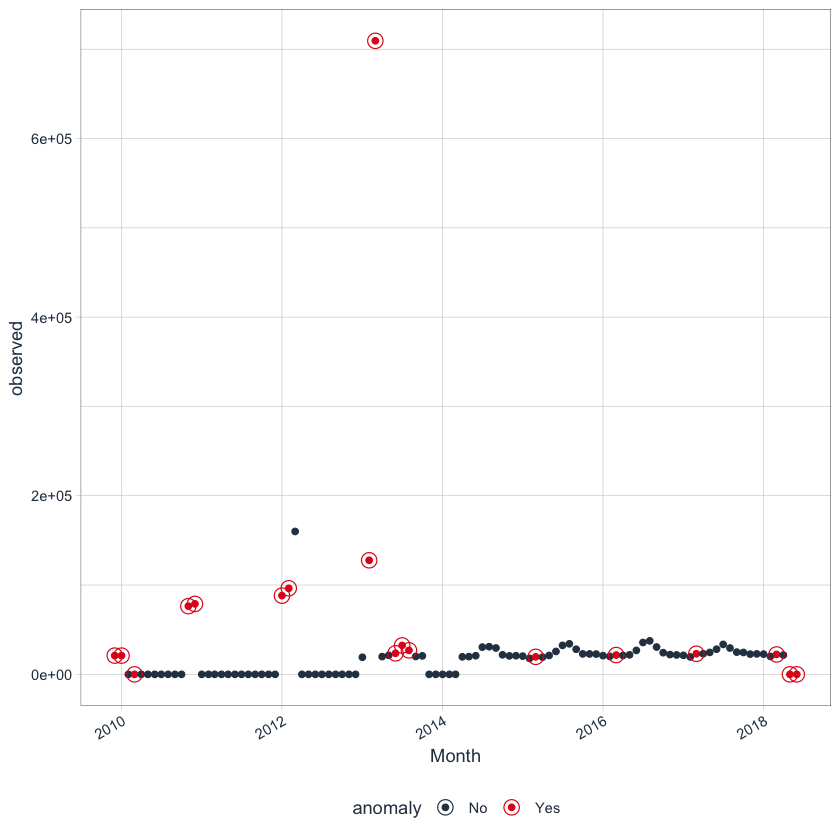

In [114]:
# i = match('56.0 - BLD 18_8572092', accounts$Building_Meter)
# results_twitter[[i]] %>% plot_anomalies()
# # results_stl[[i]] %>% plot_anomalies(time_recomposed = TRUE)
# # results_stl[[i]] %>% plot_anomaly_decomposition(alpha_dot = 0.5)
    

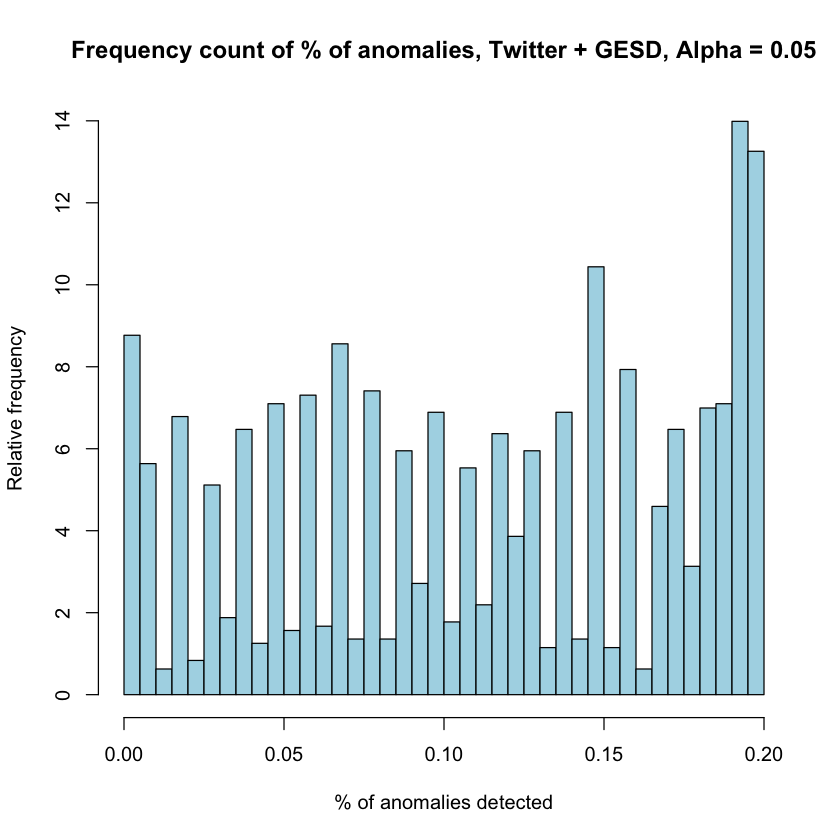

In [113]:
# hist(summary_twitter$anom_perc,
#       main="Frequency count of % of anomalies, Twitter + GESD, Alpha = 0.05",
#       xlab="% of anomalies detected",
#       ylab="Relative frequency",
#       breaks=50,
#       col="lightblue",
#       freq=FALSE)                            # freq=FALSE means to plot density, not counts
# #       xaxt="yes")                              # xaxt="n" means "x axis tick marks == no"

#### Comparing results from the two approaches

In [168]:
# summary.default <- bind_cols(summary_stl, summary_twitter)

# colnames(summary.default) <- c('account', 'points', 'anomalies_stl', 'anom_perc_stl', 'account', 'points1', 'anomalies_twitter', 'anom_perc_twitter')

# summary.default <- summary.default[, c('account', 'points', 'anomalies_stl', 'anom_perc_stl', 'anomalies_twitter', 'anom_perc_twitter')]

# summary.default <- mutate(summary.default, anom_perc_diff = (anomalies_stl - anomalies_twitter)/points)

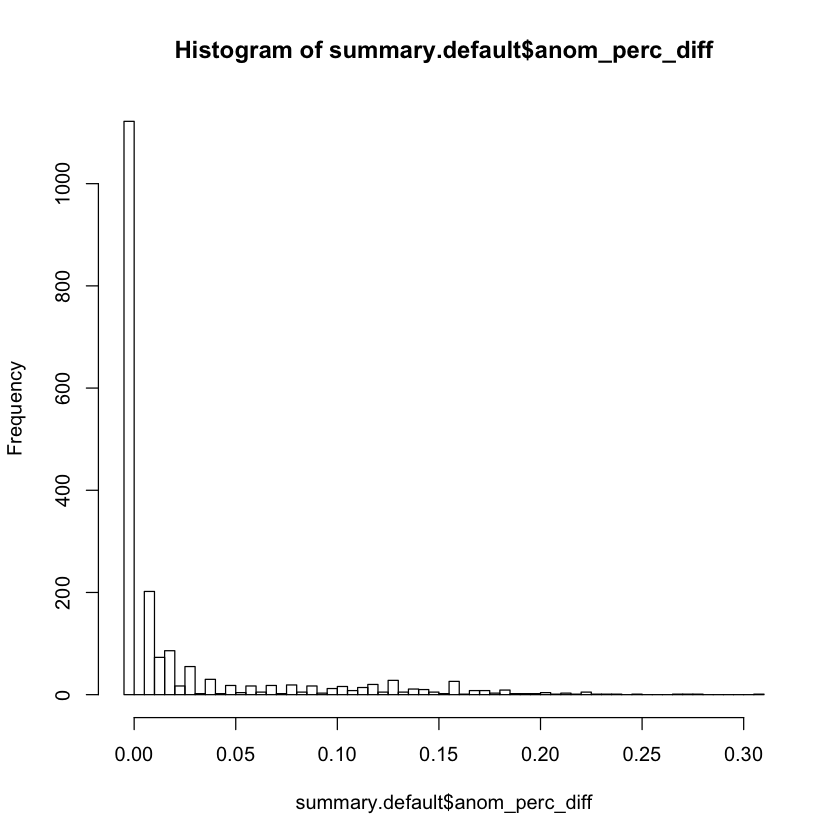

In [169]:
# hist(summary.default$anom_perc_diff, breaks = 100)

In [286]:
# head(filter(summary, anom_perc_diff > 0) %>% arrange(desc(anom_perc_diff)), 10)

account                                    points anomalies_stl
1  92.0 - BLD 20_6316120                       65    13           
2  337.0 - BLD 02_8076862                     102    12           
3  89.0 - BLD 02_8232066                       68    10           
4  502.0 - BLD 15_6316156                      64     7           
5  11.0 - CLASON POINT GARDENS BLD 44_8362632  96    19           
6  377.0 - BLD 05_6707470                     103     7           
7  377.0 - BLD 07_7356333                     103     7           
8  92.0 - BLD 16_7161509                       65    13           
9  313.0 - BLD 03_7891030                      95     6           
10 181.0 - BLD 02_8545819                     103    14           
   anom_perc_stl anomalies_twitter anom_perc_twitter anom_perc_diff
1  0.20000000     4                0.06153846        0.13846154    
2  0.11764706     3                0.02941176        0.08823529    
3  0.14705882     4                0.05882353        0.08823529    
4  0.10937500     2                0.03125000        0.07812500    
5  0.19791667    12                0.12500000        0.07291667    
6  0.06796117     0                0.00000000        0.06796117    
7  0.06796117     0                0.00000000        0.06796117    
8  0.20000000     9                0.13846154        0.06153846    
9  0.06315789     1                0.01052632        0.05263158    
10 0.13592233     9                0.08737864        0.04854369

In [287]:
# head(filter(summary, anom_perc_diff < 0) %>% arrange(desc(-anom_perc_diff)), 10)

account                                 points anomalies_stl anom_perc_stl
1  30.0 - BLD 04_8095311                    60    0             0            
2  5.0 - QUEENSBRIDGE SOUTH BLD 08_8093903  70    0             0            
3  70.0 - BLD 04_8095176                    85    0             0            
4  70.0 - BLD 08_8095184                    85    0             0            
5  70.0 - BLD 14_8095174                    85    0             0            
6  70.0 - BLD 15_8095171                    85    0             0            
7  16.0 - BROWNSVILLE BLD 03_8322424       101    0             0            
8  16.0 - BROWNSVILLE BLD 07_8322437       101    0             0            
9  16.0 - BROWNSVILLE BLD 09_8095207       101    0             0            
10 16.0 - BROWNSVILLE BLD 13_8095216       101    0             0            
   anomalies_twitter anom_perc_twitter anom_perc_diff
1  12                0.2000000         -0.2000000    
2  14                0.2000000         -0.2000000    
3  17                0.2000000         -0.2000000    
4  17                0.2000000         -0.2000000    
5  17                0.2000000         -0.2000000    
6  17                0.2000000         -0.2000000    
7  20                0.1980198         -0.1980198    
8  20                0.1980198         -0.1980198    
9  20                0.1980198         -0.1980198    
10 20                0.1980198         -0.1980198

account               points na anomalies anomalies_non_na diff anom_perc 
1 30.0 - BLD 04_8095311 60     0  2         2                0    0.03333333

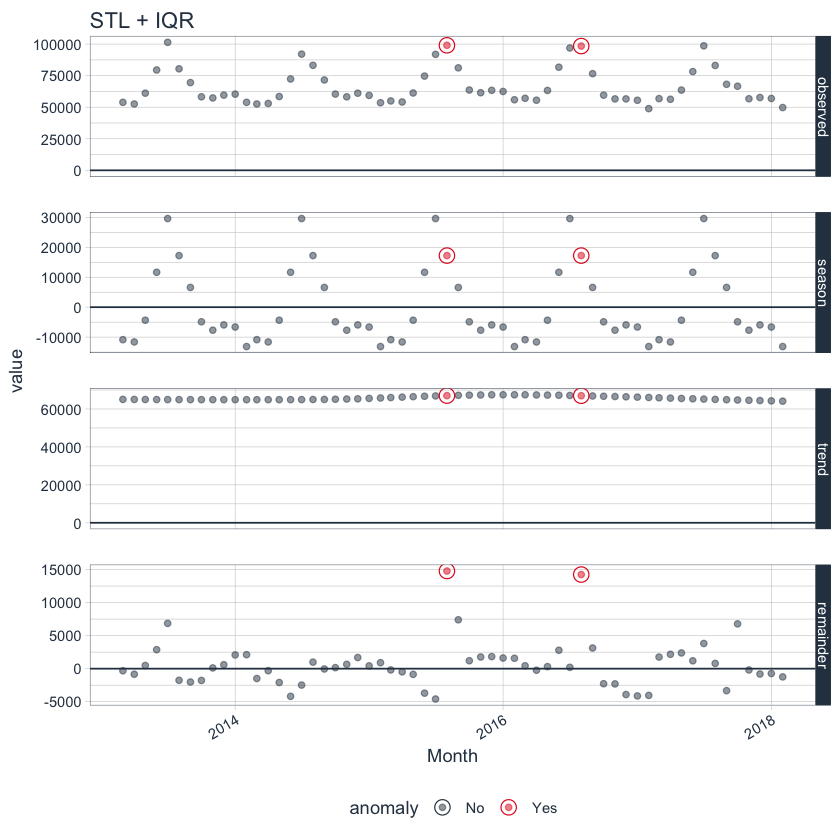

account               points na anomalies anomalies_non_na anom_perc diff
1 30.0 - BLD 04_8095311 60     0  12        12               0.2       0

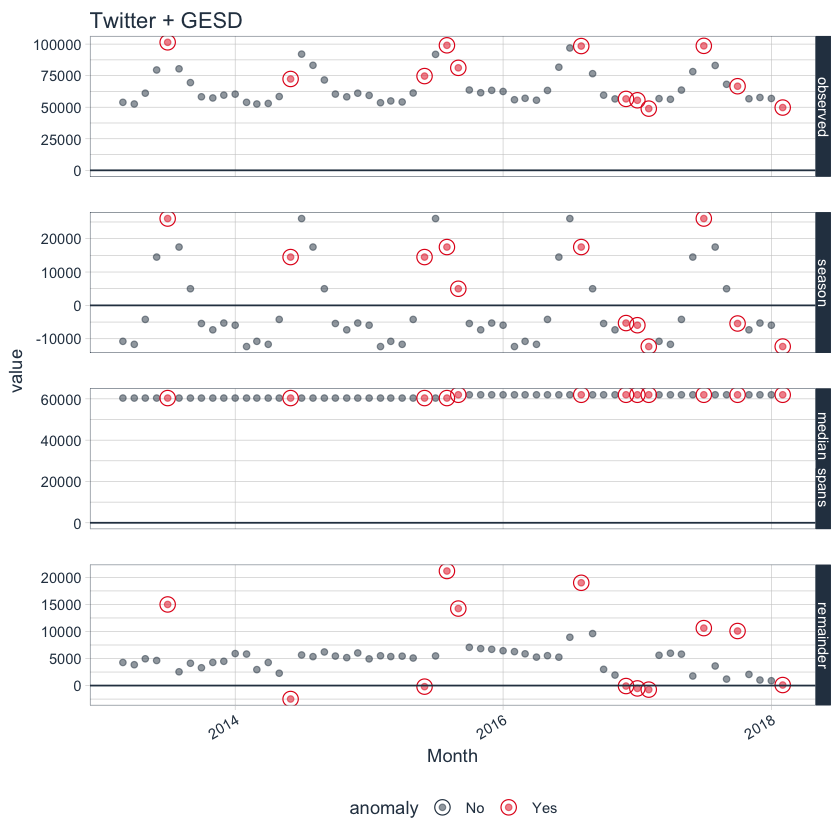

In [159]:
# i = match('30.0 - BLD 04_8095311', accounts$Building_Meter)
# results_stl[[i]] %>%
#     plot_anomaly_decomposition(alpha_dot = 0.5) +
#     ggtitle("STL + IQR")
# summary_stl[i, ]

# results_twitter[[i]] %>%
#     plot_anomaly_decomposition(alpha_dot = 0.5) +
#     ggtitle("Twitter + GESD")
# summary_twitter[i, ]
# i = i + 1

### Save the results into rdata files

##### default setting version 

In [267]:
# results_stl.default <- results_stl
# time.taken.stl.default <- time.taken.stl

# results_twitter.default <- results_twitter
# time.taken.twitter.default <- time.taken.twitter

# summary.default <- summary

# save(results_stl.default, time.taken.stl.default, results_twitter.default, time.taken.twitter.default, summary.default
#      , file = "decomposition_results_default_setting.RData")

In [50]:
# load('./decomposition_results_default_setting.RData')

##### alpha = 0.025 version 

In [ ]:
# results_stl.025 <- results_stl
# time.taken.stl.025 <- time.taken.stl

# results_twitter.025 <- results_twitter
# time.taken.twitter.025 <- time.taken.twitter

# summary.025 <- summary

# save(results_stl.025, time.taken.stl.025, results_twitter.025, time.taken.twitter.025, summary.025
#      , file = "decomposition_results_025.RData")

In [191]:
# load('./decomposition_results_025.RData')

### Plot the histogram of % of anomalies detected 

In [241]:
head(summary_stl)

account              points na anomalies anomalies_non_na na_perc    
1 1.0 - BLD 01_7836716 103    1  13        12               0.009708738
2 1.0 - BLD 01_7838586 103    0  15        15               0.000000000
3 1.0 - BLD 02_7694040 103    0  13        13               0.000000000
4 1.0 - BLD 03_7177432 103    0   0         0               0.000000000
5 1.0 - BLD 04_7381828 103    0  13        13               0.000000000
6 1.0 - BLD 05_6889487 103    0  13        13               0.000000000
  anom_perc diff
1 0.1262136 0   
2 0.1456311 0   
3 0.1262136 0   
4 0.0000000 0   
5 0.1262136 0   
6 0.1262136 0

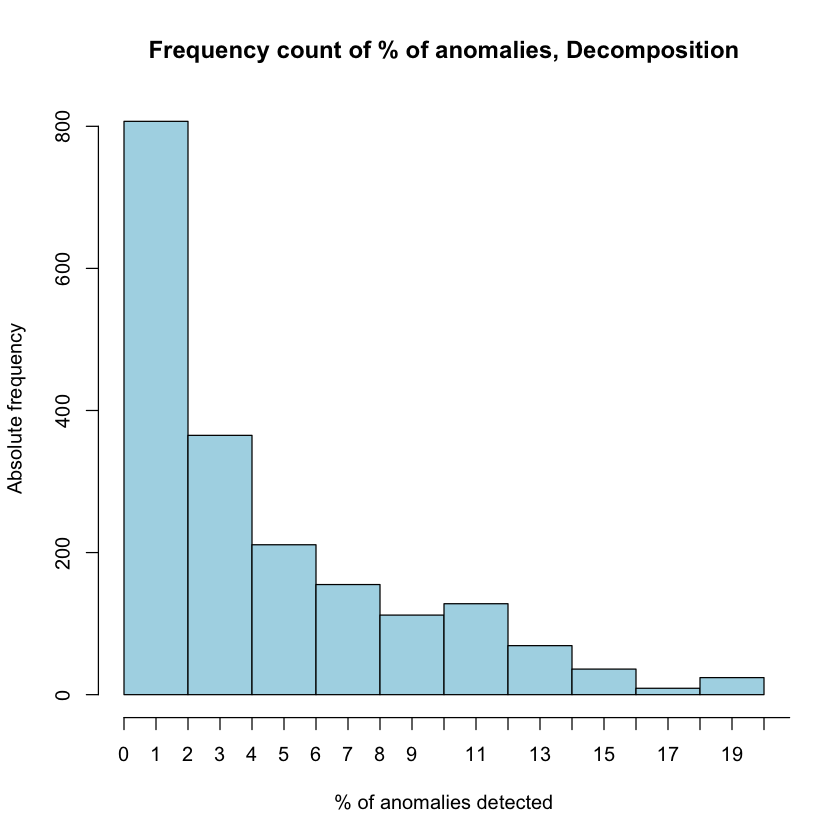

In [249]:
hist(summary_stl$anom_perc * 100,
      main="Frequency count of % of anomalies, Decomposition",
      xlab="% of anomalies detected",
      ylab="Absolute frequency",
#       breaks=100,
      col="lightblue",
      freq=TRUE,                            # freq=FALSE means to plot density, not counts
      xaxt="n")                              # xaxt="n" means "x axis tick marks == no"
axis(side=1, at=seq(0, 25, by = 1))                        

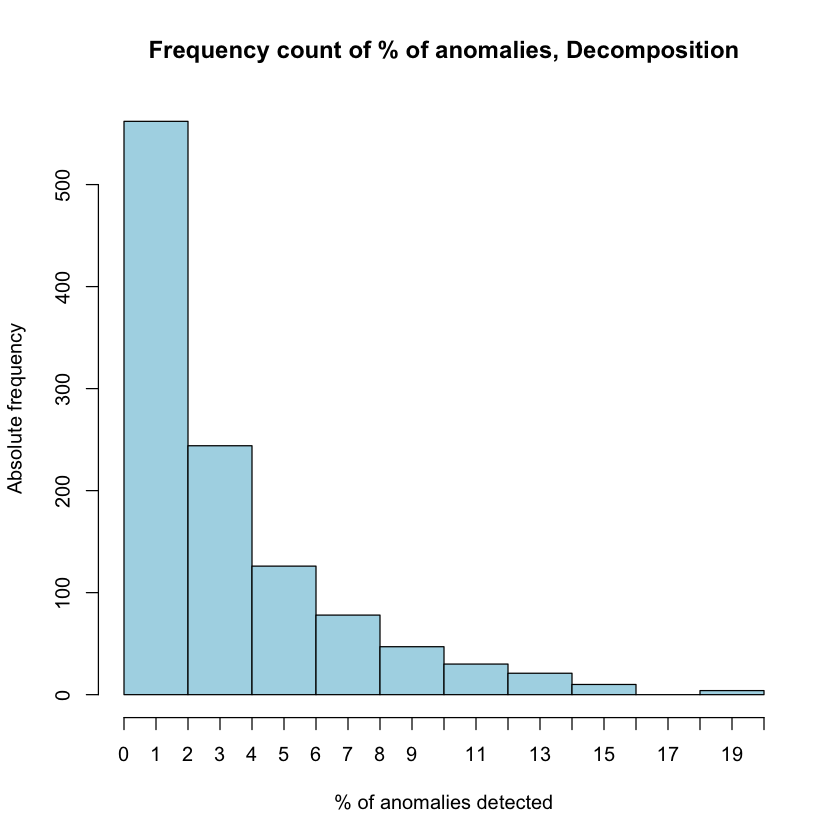

In [250]:
hist(filter(summary_stl, na_perc == 0)$anom_perc * 100,
      main="Frequency count of % of anomalies, Decomposition",
      xlab="% of anomalies detected",
      ylab="Absolute frequency",
#       breaks=100,
      col="lightblue",
      freq=TRUE,                            # freq=FALSE means to plot density, not counts
      xaxt="n")                              # xaxt="n" means "x axis tick marks == no"
axis(side=1, at=seq(0, 20, by=1))                        

#### Misc testing

In [262]:
filter(summary_stl, account == '1.0 - BLD 03_7177432')

account              points na anomalies anomalies_non_na na_perc   anom_perc
1 1.0 - BLD 03_7177432 103    14 0         0                0.1359223 0        
  diff
1 14

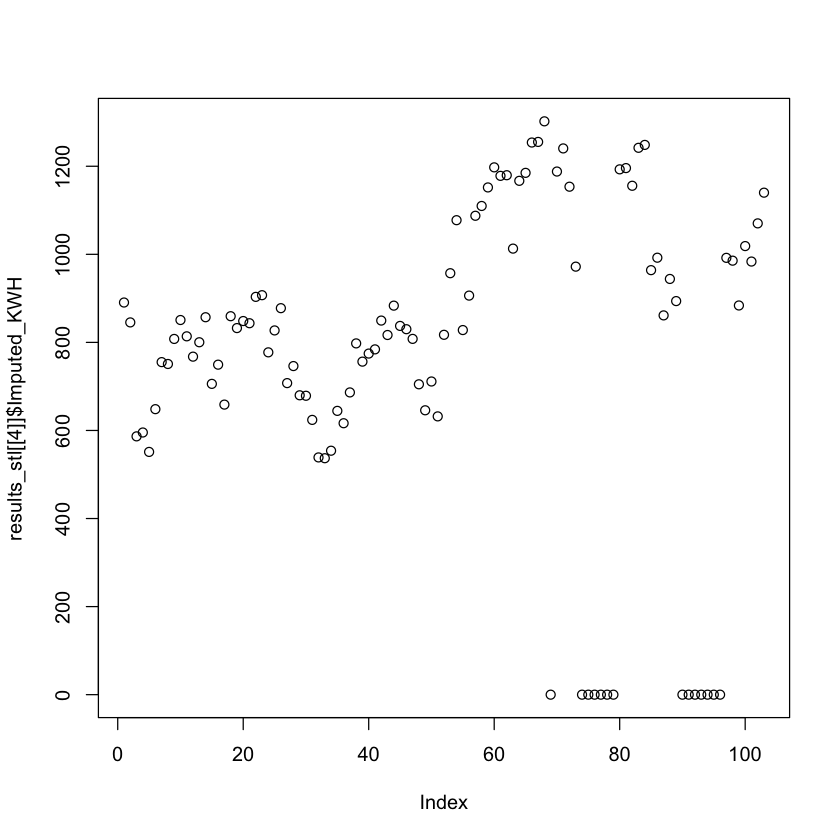

In [286]:
plot(results_stl[[4]]$Imputed_KWH)

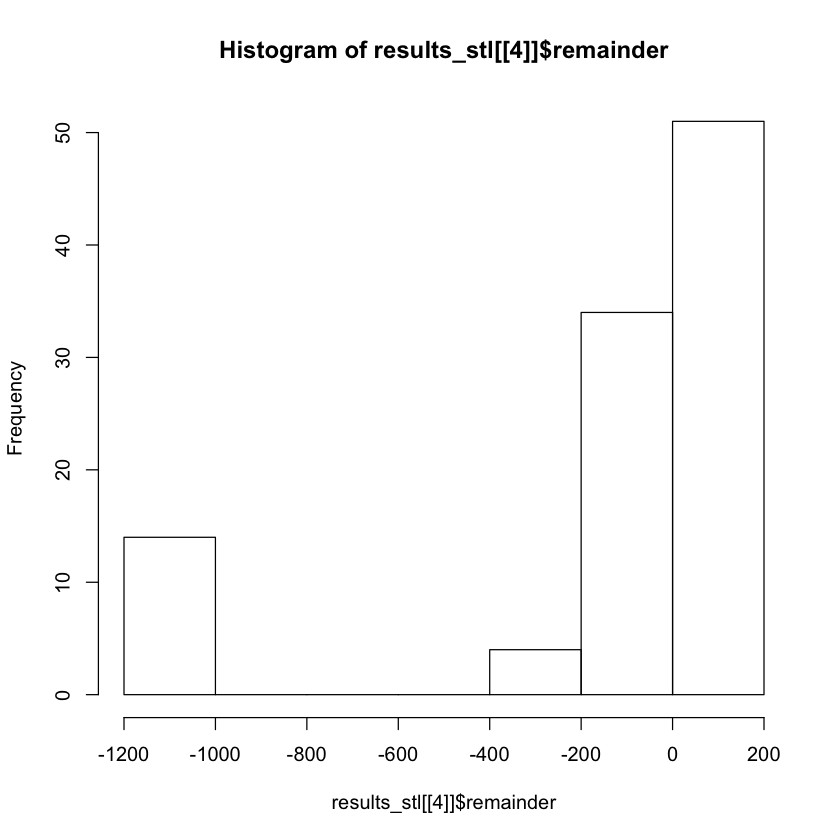

In [308]:
hist(results_stl[[4]]$remainder)

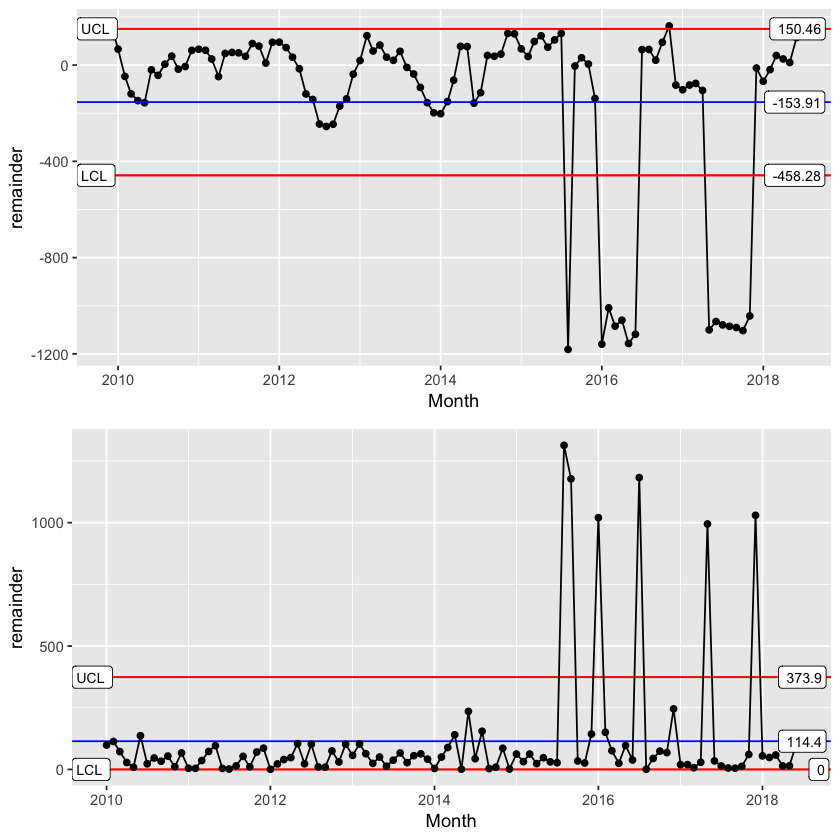

In [268]:
x_Plot <- ggplot(results_stl[[4]], aes(x = Month, y = remainder)) + geom_point() + geom_line() + 
  stat_QC(method = 'XmR', auto.label = T, label.digits = 2, show.1n2.sigma = F) 

mR_Plot <- ggplot(results_stl[[4]], aes(x = Month, y = remainder)) + stat_mR() + stat_QC_labels(method="mR")

grid.arrange(x_Plot, mR_Plot, nrow=2)

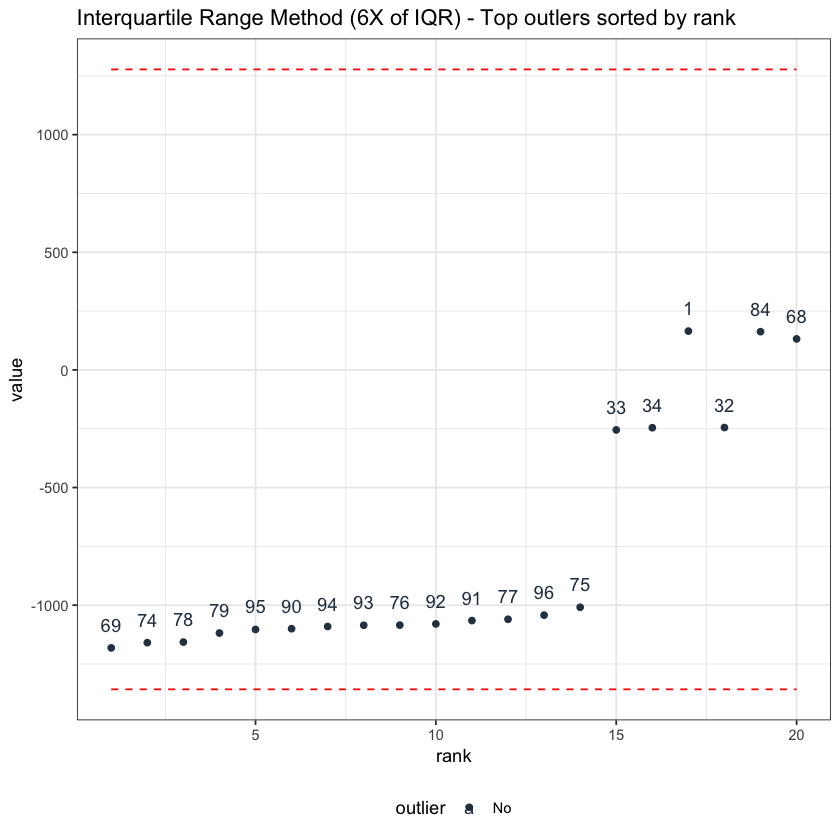

In [279]:
outliers <- iqr(results_stl[[4]]$remainder, verbose = TRUE, alpha = 0.025)$outlier_report
outliers %>% 
    ggsetup() +
    ggtitle("Interquartile Range Method (6X of IQR) - Top outlers sorted by rank") 

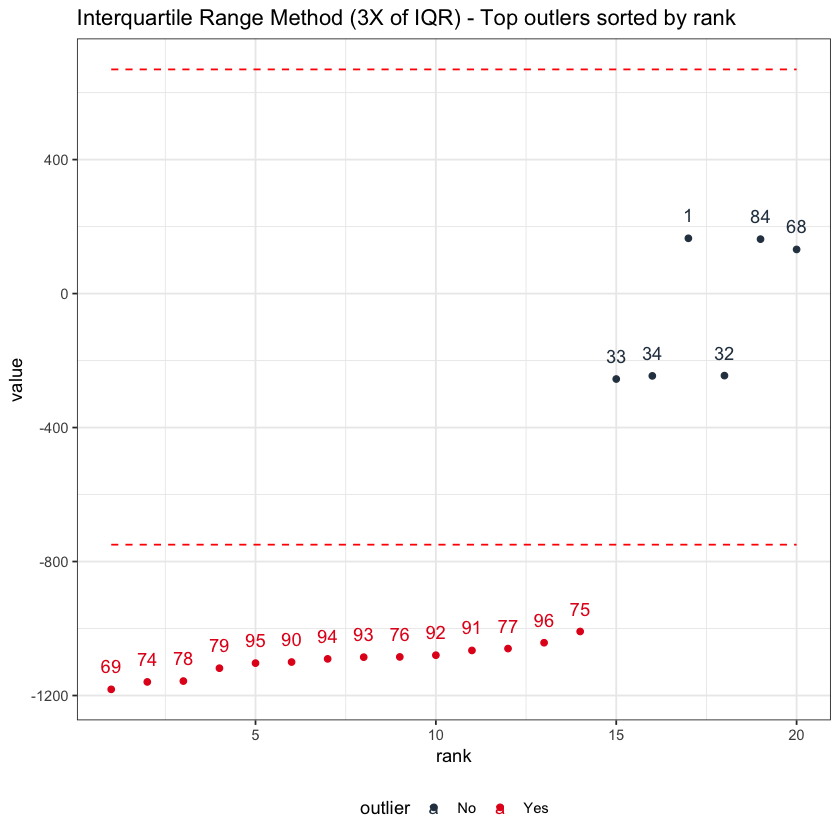

In [280]:
outliers <- iqr(results_stl[[4]]$remainder, verbose = TRUE, alpha = 0.05)$outlier_report
outliers %>% 
    ggsetup() +
    ggtitle("Interquartile Range Method (3X of IQR) - Top outlers sorted by rank") 

In [267]:
results_stl[[4]]

Month      Imputed_KWH observed      season      trend    remainder  
1   2009-12-01 890.5455    890.5455       -28.778496 754.3065  165.017449
2   2010-01-01 845.3818    845.3818        23.060967 756.0195   66.301380
3   2010-02-01 586.5931    586.5931      -124.033294 757.7324  -47.106045
4   2010-03-01 595.3682    595.3682       -44.525545 759.4454 -119.551682
5   2010-04-01 551.2673    551.2673       -62.114593 761.1584 -147.776510
6   2010-05-01 648.3714    648.3714        42.231909 762.8714 -156.731835
7   2010-06-01 755.2000    755.2000        11.112308 763.8270  -19.739300
8   2010-07-01 750.9677    750.9677        28.846822 764.7826  -42.661711
9   2010-08-01 807.8323    807.8323        38.273379 765.7383    3.820610
10  2010-09-01 850.8000    850.8000        46.946792 766.6939   37.159300
11  2010-10-01 813.7548    813.7548        63.157089 767.6495  -17.051796
12  2010-11-01 767.6129    767.6129         5.822704 767.8733   -6.083055
13  2010-12-01 800.3050    800.3050       -28.778496 768.0970   60.986517
14  2011-01-01 857.1273    857.1273        23.060967 768.3207   65.745633
15  2011-02-01 705.8069    705.8069      -124.033294 768.5444   61.295808
16  2011-03-01 749.4060    749.4060       -44.525545 768.7681   25.163460
17  2011-04-01 658.7319    658.7319       -62.114593 768.7962  -47.949637
18  2011-05-01 859.4483    859.4483        42.231909 768.8242   48.392149
19  2011-06-01 832.5000    832.5000        11.112308 768.8523   52.535411
20  2011-07-01 848.4828    848.4828        28.846822 768.8803   50.755592
21  2011-08-01 843.5172    843.5172        38.273379 768.9084   36.335454
22  2011-09-01 903.3750    903.3750        46.946792 767.0286   89.399599
23  2011-10-01 907.1767    907.1767        63.157089 765.1488   78.870826
24  2011-11-01 777.3838    777.3838         5.822704 763.2690    8.292046
25  2011-12-01 827.1554    827.1554       -28.778496 761.3892   94.544711
26  2012-01-01 877.7091    877.7091        23.060967 759.5094   95.138714
27  2012-02-01 707.5226    707.5226      -124.033294 758.7756   72.780243
28  2012-03-01 746.2291    746.2291       -44.525545 758.0419   32.712836
29  2012-04-01 679.8621    679.8621       -62.114593 757.3081  -15.331410
30  2012-05-01 678.7862    678.7862        42.231909 756.5743 -120.019995
⋮   ⋮          ⋮           ⋮             ⋮           ⋮        ⋮          
74  2016-01-01    0.0000   -3.907985e-14   23.060967 1136.379 -1159.43982
75  2016-02-01    0.0000   -4.263256e-14 -124.033294 1132.834 -1008.80117
76  2016-03-01    0.0000   -7.105427e-14  -44.525545 1129.290 -1084.76453
77  2016-04-01    0.0000   -7.105427e-14  -62.114593 1121.961 -1059.84664
78  2016-05-01    0.0000    4.973799e-14   42.231909 1114.632 -1156.86430
79  2016-06-01    0.0000   -2.842171e-14   11.112308 1107.304 -1118.41585
80  2016-07-01 1192.9655    1.192966e+03   28.846822 1099.975    64.14399
81  2016-08-01 1195.8207    1.195821e+03   38.273379 1092.646    64.90145
82  2016-09-01 1155.6750    1.155675e+03   46.946792 1088.485    20.24368
83  2016-10-01 1241.8836    1.241884e+03   63.157089 1084.323    94.40334
84  2016-11-01 1248.4672    1.248467e+03    5.822704 1080.162   162.48262
85  2016-12-01  964.0469    9.640469e+02  -28.778496 1076.001   -83.17511
86  2017-01-01  992.3273    9.923273e+02   23.060967 1071.839  -102.57289
87  2017-02-01  861.3032    8.613032e+02 -124.033294 1068.333   -82.99623
88  2017-03-01  944.0623    9.440623e+02  -44.525545 1064.826   -76.23847
89  2017-04-01  893.7931    8.937931e+02  -62.114593 1061.320  -105.41216
90  2017-05-01    0.0000    4.973799e-14   42.231909 1057.813 -1100.04532
91  2017-06-01    0.0000   -2.842171e-14   11.112308 1054.307 -1065.41927
92  2017-07-01    0.0000   -4.618528e-14   28.846822 1050.758 -1079.60485
93  2017-08-01    0.0000    2.842171e-14   38.273379 1047.209 -1085.48249
94  2017-09-01    0.0000    9.947598e-14   46.946792 1043.660 -1090.60697
95  2017-10-01    0.0000   -8.526513e-14   63.157089 1040.111 -1103.26834
96  2017

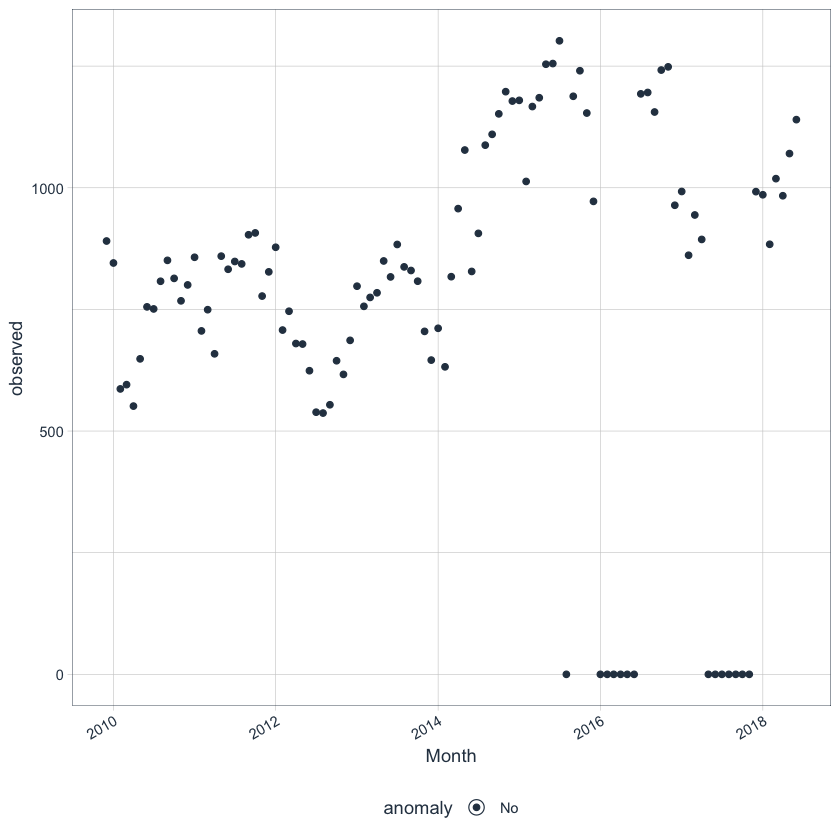

In [264]:
i = match('56.0 - BLD 18_8572092', accounts$Building_Meter)
results_stl[[4]] %>% plot_anomalies()
# results_stl[[i]] %>% plot_anomalies(time_recomposed = TRUE)
# results_stl[[i]] %>% plot_anomaly_decomposition(alpha_dot = 0.5)
    

### Load in data from other 2 approaches

### Prophet

In [14]:
summary_prophet = read_csv("../../output//histogram_prophet.csv")

summary_prophet <- select(summary_prophet, c('Build_id', 'Total_Count', 'Total_Anomalies', 'Percentage'))

summary_prophet <- rename(summary_prophet, account = Build_id, points = Total_Count, anomalies = Total_Anomalies, anom_perc = Percentage)

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  Build_id = col_character(),
  Total_Anomalies = col_double(),
  Total_Count = col_double(),
  Percentage = col_double()
)


In [15]:
summary_prophet <- inner_join(summary_prophet, accounts, by = c("account" = "Building_Meter"))

In [16]:
head(summary_prophet)

account               points anomalies anom_perc counts na_counts na_perc   
1 1.0 - BLD 01_7836716   90    1         1.111111  103    13        0.12621359
2 1.0 - BLD 01_7838586   87    4         4.597701  103    16        0.15533981
3 1.0 - BLD 04_7381828   90    3         3.333333  103    13        0.12621359
4 10.0 - BLD 01_7864550 100    6         6.000000  102     2        0.01960784
5 10.0 - BLD 02_7864551 100    3         3.000000  102     2        0.01960784
6 10.0 - BLD 03_8010023 100    2         2.000000  102     2        0.01960784

#### all 1,740 accounts are included in the 1,916 accounts

In [17]:
dim(summary_prophet)

[1] 1740    7

[1] 1740

In [26]:
summary_prophet$anom_perc

[1] 1.1111111 4.5977011 3.3333333 6.0000000 3.0000000 2.0000000 2.0000000
   [8] 2.5641026 2.5316456 1.0000000 5.0000000 2.0618557 2.0000000 4.0404040
  [15] 2.0618557 3.0000000 2.0202020 4.0000000 2.7027027 2.9411765 1.9607843
  [22] 1.4084507 3.9215686 3.8834951 1.9607843 1.9607843 3.0612245 2.9411765
  [29] 2.9411765 1.9801980 1.5625000 1.5625000 1.5625000 2.5316456 1.1494253
  [36] 2.0618557 2.1505376 1.9607843 1.9417476 1.9607843 2.1505376 3.1578947
  [43] 4.1095890 1.4084507 1.9607843 2.7397260 4.1095890 4.1095890 1.9607843
  [50] 2.9126214 3.9603960 3.1578947 2.8571429 2.2471910 2.0202020 3.9603960
  [57] 4.0404040 2.9702970 1.0204082 2.0618557 5.2083333 2.0408163 2.0833333
  [64] 1.0869565 2.0618557 2.2222222 1.9417476 2.9702970 4.0816327 4.0404040
  [71] 5.8252427 1.4084507 1.9230769 2.9411765 3.0303030 1.3513514 3.1250000
  [78] 1.9801980 2.9411765 1.9801980 3.9215686 0.9708738 2.9126214 1.9607843
  [85] 5.2083333 4.0000000 2.1739130 3.1250000 5.1546392 1.9417476 2.3809524
  [92] 3.9215686 3.9603960 5.0000000 1.9607843 2.2727273 4.0816327 3.0000000
  [99] 1.2500000 3.0000000 1.9607843 2.2988506 2.0000000 3.0303030 5.0505051
 [106] 2.9702970 3.9215686 5.9405941 1.4285714 4.0000000 1.0000000 1.9801980
 [113] 1.0000000 4.8543689 2.9850746 3.2258065 2.7397260 2.1739130 1.0869565
 [120] 2.2222222 2.1739130 1.3333333 1.3157895 1.4084507 1.3513514 5.3333333
 [127] 2.1739130 4.3478261 2.1739130 2.1978022 2.1978022 1.4705882 2.0833333
 [134] 2.1505376 2.9411765 1.9801980 0.9900990 3.9603960 2.9126214 2.9411765
 [141] 3.8834951 3.0612245 1.1235955 3.3707865 4.7619048 3.1746032 3.3707865
 [148] 1.9801980 1.9417476 1.9417476 3.8834951 1.9417476 2.7027027 2.9702970
 [155] 4.9504950 2.9411765 1.9607843 2.9411765 3.9215686 4.0816327 0.9900990
 [162] 1.9801980 2.9411765 3.0303030 0.9803922 2.6666667 2.5974026 2.5974026
 [169] 2.5974026 2.5641026 2.6315789 2.6315789 2.5641026 2.5641026 3.7974684
 [176] 2.5974026 1.2987013 2.5641026 2.6315789 2.5641026 1.2820513 3.7500000
 [183] 2.5641026 2.6315789 3.7974684 2.5000000 2.5641026 2.5641026 3.9215686
 [190] 3.0303030 1.9417476 2.9126214 3.8834951 4.8543689 3.8834951 1.9417476
 [197] 1.0000000 2.9126214 0.9803922 1.9417476 1.9417476 1.9801980 2.9411765
 [204] 1.9417476 3.0000000 1.2658228 4.5977011 2.8985507 1.9801980 5.0000000
 [211] 4.0404040 2.0000000 1.8867925 1.8867925 3.7735849 3.7735849 1.8867925
 [218] 1.8867925 1.8867925 1.8867925 1.8867925 1.8867925 1.8867925 1.8518519
 [225] 1.5151515 3.7037037 2.9702970 0.9900990 4.0000000 1.6129032 1.8181818
 [232] 2.0618557 2.5641026 4.9504950 3.1250000 4.8543689 2.9411765 4.9504950
 [239] 3.5714286 1.9607843 3.4482759 3.4482759 2.2988506 2.2988506 3.4090909
 [246] 2.2988506 3.4482759 1.4925373 2.2727273 3.4482759 3.4482759 3.3707865
 [253] 2.5316456 4.5977011 2.8571429 2.0833333 1.3513514 0.9803922 0.9803922
 [260] 1.9607843 3.9603960 0.9803922 1.0638298 1.4492754 1.3888889 0.9708738
 [267] 2.8169014 1.4084507 2.2988506 2.2988506 4.2253521 2.8169014 2.0408163
 [274] 3.0769231 2.0408163 4.1666667 2.2727273 1.0204082 1.9801980 2.7397260
 [281] 2.0000000 3.0612245 1.0309278 4.1237113 2.9702970 2.0000000 3.1250000
 [288] 3.0000000 1.3698630 1.6129032 1.6129032 1.6129032 1.6129032 1.6129032
 [295] 3.2258065 1.6129032 1.6129032 1.6129032 1.6129032 3.2258065 1.6129032
 [302] 1.6129032 1.6129032 2.1276596 4.2553191 3.3707865 4.2105263 0.9803922
 [309] 2.9126214 0.9900990 2.1052632 1.0000000 4.0404040 1.9607843 2.0000000
 [316] 1.9607843 2.0000000 0.9803922 2.0000000 0.9803922 1.0526316 2.9411765
 [323] 2.2222222 0.9803922 3.0000000 2.0408163 2.9702970 1.9607843 3.0927835
 [330] 4.1666667 2.4691358 5.3191489 1.6949153 3.0612245 3.2608696 6.0606061
 [337] 5.0505051 4.0404040 2.0833333 4.0404040 3.0303030 6.0606061 5.1546392
 [344] 4.0404040 4.0540541 4.0000000 4.1237113 4.1666667 3.0000000 4.0000000
 [351] 1.0000000 2.0000000 5.0000000 5.0000000 3.0000000 5.0000000 3.0000000
 [358] 2.0000000 2.0000000 1.0101010 0.9900990 3.0000000 2.0408163 2.0618557

[1] 1.1111111 4.5977011 3.3333333 6.0000000 3.0000000 2.0000000 2.0000000
   [8] 2.5641026 2.5316456 1.0000000 5.0000000 2.0618557 2.0000000 4.0404040
  [15] 2.0618557 3.0000000 2.0202020 4.0000000 2.7027027 2.9411765 1.9607843
  [22] 1.4084507 3.9215686 3.8834951 1.9607843 1.9607843 3.0612245 2.9411765
  [29] 2.9411765 1.9801980 1.5625000 1.5625000 1.5625000 2.5316456 1.1494253
  [36] 2.0618557 2.1505376 1.9607843 1.9417476 1.9607843 2.1505376 3.1578947
  [43] 4.1095890 1.4084507 1.9607843 2.7397260 4.1095890 4.1095890 1.9607843
  [50] 2.9126214 3.9603960 3.1578947 2.8571429 2.2471910 2.0202020 3.9603960
  [57] 4.0404040 2.9702970 1.0204082 2.0618557 5.2083333 2.0408163 2.0833333
  [64] 1.0869565 2.0618557 2.2222222 1.9417476 2.9702970 4.0816327 4.0404040
  [71] 5.8252427 1.4084507 1.9230769 2.9411765 3.0303030 1.3513514 3.1250000
  [78] 1.9801980 2.9411765 1.9801980 3.9215686 0.9708738 2.9126214 1.9607843
  [85] 5.2083333 4.0000000 2.1739130 3.1250000 5.1546392 1.9417476 2.3809524
  [92] 3.9215686 3.9603960 5.0000000 1.9607843 2.2727273 4.0816327 3.0000000
  [99] 1.2500000 3.0000000 1.9607843 2.2988506 2.0000000 3.0303030 5.0505051
 [106] 2.9702970 3.9215686 5.9405941 1.4285714 4.0000000 1.0000000 1.9801980
 [113] 1.0000000 4.8543689 2.9850746 3.2258065 2.7397260 2.1739130 1.0869565
 [120] 2.2222222 2.1739130 1.3333333 1.3157895 1.4084507 1.3513514 5.3333333
 [127] 2.1739130 4.3478261 2.1739130 2.1978022 2.1978022 1.4705882 2.0833333
 [134] 2.1505376 2.9411765 1.9801980 0.9900990 3.9603960 2.9126214 2.9411765
 [141] 3.8834951 3.0612245 1.1235955 3.3707865 4.7619048 3.1746032 3.3707865
 [148] 1.9801980 1.9417476 1.9417476 3.8834951 1.9417476 2.7027027 2.9702970
 [155] 4.9504950 2.9411765 1.9607843 2.9411765 3.9215686 4.0816327 0.9900990
 [162] 1.9801980 2.9411765 3.0303030 0.9803922 2.6666667 2.5974026 2.5974026
 [169] 2.5974026 2.5641026 2.6315789 2.6315789 2.5641026 2.5641026 3.7974684
 [176] 2.5974026 1.2987013 2.5641026 2.6315789 2.5641026 1.2820513 3.7500000
 [183] 2.5641026 2.6315789 3.7974684 2.5000000 2.5641026 2.5641026 3.9215686
 [190] 3.0303030 1.9417476 2.9126214 3.8834951 4.8543689 3.8834951 1.9417476
 [197] 1.0000000 2.9126214 0.9803922 1.9417476 1.9417476 1.9801980 2.9411765
 [204] 1.9417476 3.0000000 1.2658228 4.5977011 2.8985507 1.9801980 5.0000000
 [211] 4.0404040 2.0000000 1.8867925 1.8867925 3.7735849 3.7735849 1.8867925
 [218] 1.8867925 1.8867925 1.8867925 1.8867925 1.8867925 1.8867925 1.8518519
 [225] 1.5151515 3.7037037 2.9702970 0.9900990 4.0000000 1.6129032 1.8181818
 [232] 2.0618557 2.5641026 4.9504950 3.1250000 4.8543689 2.9411765 4.9504950
 [239] 3.5714286 1.9607843 3.4482759 3.4482759 2.2988506 2.2988506 3.4090909
 [246] 2.2988506 3.4482759 1.4925373 2.2727273 3.4482759 3.4482759 3.3707865
 [253] 2.5316456 4.5977011 2.8571429 2.0833333 1.3513514 0.9803922 0.9803922
 [260] 1.9607843 3.9603960 0.9803922 1.0638298 1.4492754 1.3888889 0.9708738
 [267] 2.8169014 1.4084507 2.2988506 2.2988506 4.2253521 2.8169014 2.0408163
 [274] 3.0769231 2.0408163 4.1666667 2.2727273 1.0204082 1.9801980 2.7397260
 [281] 2.0000000 3.0612245 1.0309278 4.1237113 2.9702970 2.0000000 3.1250000
 [288] 3.0000000 1.3698630 1.6129032 1.6129032 1.6129032 1.6129032 1.6129032
 [295] 3.2258065 1.6129032 1.6129032 1.6129032 1.6129032 3.2258065 1.6129032
 [302] 1.6129032 1.6129032 2.1276596 4.2553191 3.3707865 4.2105263 0.9803922
 [309] 2.9126214 0.9900990 2.1052632 1.0000000 4.0404040 1.9607843 2.0000000
 [316] 1.9607843 2.0000000 0.9803922 2.0000000 0.9803922 1.0526316 2.9411765
 [323] 2.2222222 0.9803922 3.0000000 2.0408163 2.9702970 1.9607843 3.0927835
 [330] 4.1666667 2.4691358 5.3191489 1.6949153 3.0612245 3.2608696 6.0606061
 [337] 5.0505051 4.0404040 2.0833333 4.0404040 3.0303030 6.0606061 5.1546392
 [344] 4.0404040 4.0540541 4.0000000 4.1237113 4.1666667 3.0000000 4.0000000
 [351] 1.0000000 2.0000000 5.0000000 5.0000000 3.0000000 5.0000000 3.0000000
 [358] 2.0000000 2.0000000 1.0101010 0.9900990 3.0000000 2.0408163 2.0618557

In [18]:
accounts

Building_Meter                            counts na_counts na_perc    
1    1.0 - BLD 01_7836716                      103    13        0.126213592
2    1.0 - BLD 01_7838586                      103    16        0.155339806
3    1.0 - BLD 02_7694040                      103    13        0.126213592
4    1.0 - BLD 03_7177432                      103    14        0.135922330
5    1.0 - BLD 04_7381828                      103    13        0.126213592
6    1.0 - BLD 05_6889487                      103    13        0.126213592
7    1.0 - BLD 06_6469176                      103    13        0.126213592
8    1.0 - BLD 07_7006908                       73     1        0.013698630
9    10.0 - BLD 01_7864550                     102     2        0.019607843
10   10.0 - BLD 02_7864551                     102     2        0.019607843
11   10.0 - BLD 03_8010023                     102     2        0.019607843
12   10.0 - BLD 04_7864536                     102     2        0.019607843
13   10.0 - BLD 05_8163877                     101    23        0.227722772
14   10.0 - BLD 06_8163892                      99    20        0.202020202
15   10.0 - BLD 07_8010032                     102     2        0.019607843
16   10.0 - BLD 08_7864549                     102     2        0.019607843
17   10.0 - BLD 09_8125376                     102     5        0.049019608
18   10.0 - BLD 10_8010020                     102     2        0.019607843
19   10.0 - BLD 11_7864545                     102     3        0.029411765
20   10.0 - BLD 13_8301063                     102     5        0.049019608
21   10.0 - BLD 14_8301067                     102     2        0.019607843
22   10.0 - BLD 15_7864540                     102     3        0.029411765
23   10.0 - BLD 16_7864543                     102     2        0.019607843
24   10.0 - BLD 16_8163879                     100    26        0.260000000
25   100.0 - BLD 01_7250288                    103     1        0.009708738
26   100.0 - BLD 02_6458115                    103     1        0.009708738
27   100.0 - BLD 03 - Community Center_5537272  72     1        0.013888889
28   101.0 - BLD 02_7834072                    103     1        0.009708738
29   101.0 - BLD 04_7421675                    103     0        0.000000000
30   102.0 - BLD 02_8107087                    102     0        0.000000000
⋮    ⋮                                         ⋮      ⋮         ⋮          
1887 93.0 - BLD 06_8075321                     103     0        0.000000000
1888 96.0 - BLD 01_5922430                     103     8        0.077669903
1889 96.0 - BLD 02_8802096                     103     7        0.067961165
1890 96.0 - BLD 03_8072599                      98     0        0.000000000
1891 96.0 - BLD 04_6867055                     103     3        0.029126214
1892 96.0 - BLD 05_5922332                     102     2        0.019607843
1893 96.0 - BLD 06_8072600                     103     0        0.000000000
1894 96.0 - BLD 07_7719186                     103     6        0.058252427
1895 96.0 - BLD 08_5922010                     103    10        0.097087379
1896 97.0 - BLD 01_6689046                     103     2        0.019417476
1897 97.0 - BLD 02_6647840                     103     2        0.019417476
1898 97.0 - BLD 03_8205892                      76     0        0.000000000
1899 97.0 - BLD 04_6623223                     103     4        0.038834951
1900 97.0 - BLD 05_6852189                     103     1        0.009708738
1901 97.0 - BLD 09_6458213                     103     2        0.019417476
1902 97.0 - BLD 09_6852169                      95     8        0.084210526
1903 97.0 - BLD 10 - Community Center_7294308   98     1        0.010204082
1904 97.0 - BLD 10 - Community Center_7694984  103     3        0.029126214
1905 98.0 - BLD 14_99800010                     58     5        0.086206897
1906 98.0 - BLD 15_99275963                    102    28        0.274509804
1907 98.0 - BLD 15_99277502                    102   

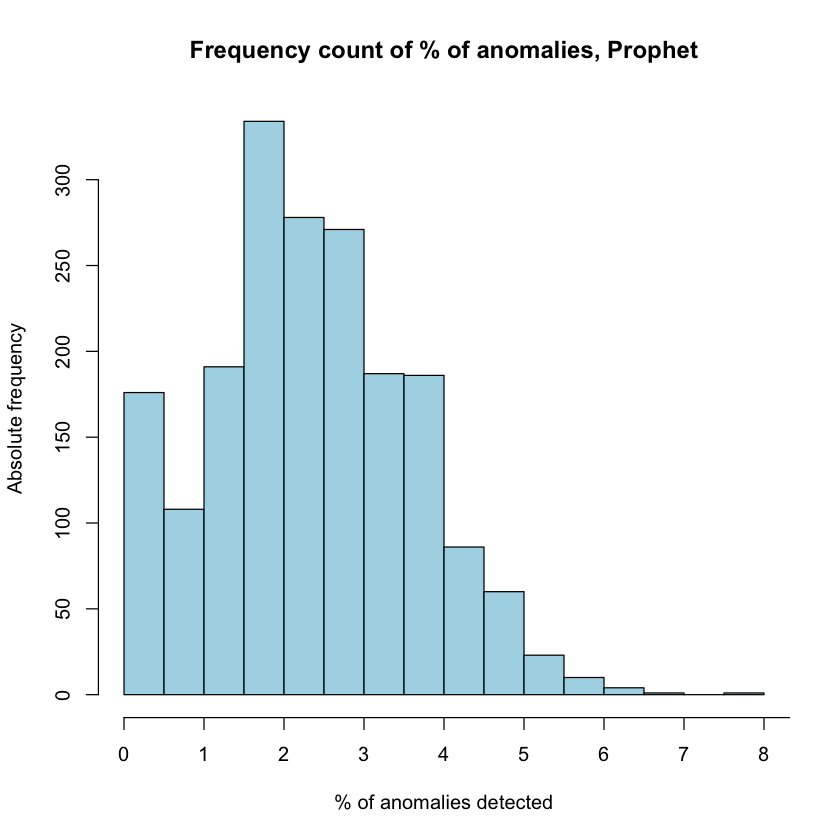

In [29]:
hist(c(summary_prophet$anom_perc, rep(0, nrow(accounts) - length(summary_prophet$anom_perc))), 
      main="Frequency count of % of anomalies, Prophet",
      xlab="% of anomalies detected",
      ylab="Absolute frequency",
#       breaks=100,
      col="lightblue",
      freq=TRUE,                            # freq=FALSE means to plot density, not counts
      xaxt="n")                              # xaxt="n" means "x axis tick marks == no"
axis(side=1, at=seq(0, 10, by=1))

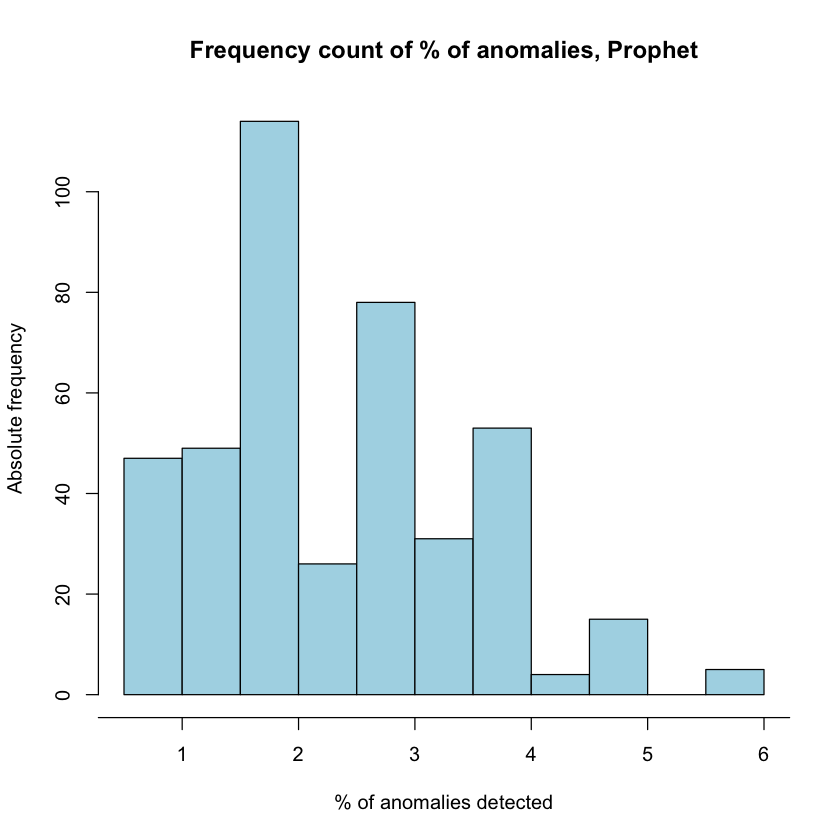

In [227]:
hist(filter(summary_prophet, na_perc == 0)$anom_perc,
      main="Frequency count of % of anomalies, Prophet",
      xlab="% of anomalies detected",
      ylab="Absolute frequency",
#       breaks=100,
      col="lightblue",
      freq=TRUE,                            # freq=FALSE means to plot density, not counts
      xaxt="n")                              # xaxt="n" means "x axis tick marks == no"
axis(side=1, at=seq(0, 10, by=1))

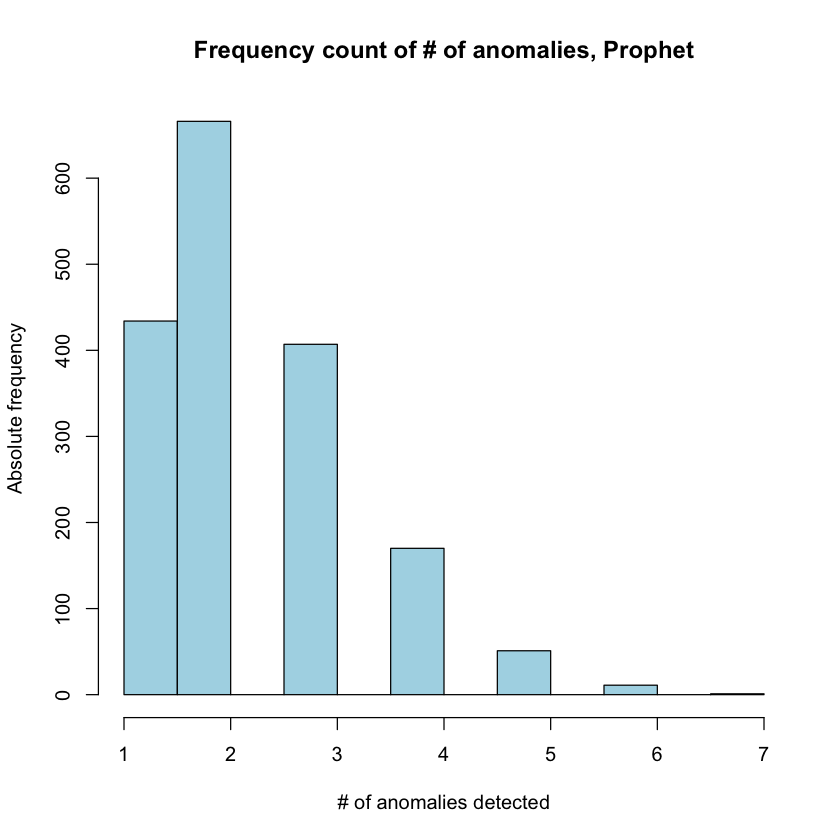

In [176]:
hist(summary_prophet$anomalies,
      main="Frequency count of # of anomalies, Prophet",
      xlab="# of anomalies detected",
      ylab="Absolute frequency",
      breaks=10,
      col="lightblue",
      freq=TRUE)                            # freq=FALSE means to plot density, not counts
#       xaxt="yes")                              # xaxt="n" means "x axis tick marks == no"

### Clustering

In [177]:
summary_clustering = read_csv("../../output/summary_clustering.csv")

summary_clustering <- rename(summary_clustering, account = Building_Meter, non_anomalies = 'FALSE', anomalies = 'TRUE', anom_perc = PCNT)

summary_clustering <- mutate(summary_clustering, points = non_anomalies + anomalies)

summary_clustering <- select(summary_clustering, c('account', 'points', 'anomalies', 'anom_perc'))

summary_clustering <- mutate(summary_clustering, anom_perc = round(anom_perc * 100, 8))

Parsed with column specification:
cols(
  Building_Meter = col_character(),
  `FALSE` = col_double(),
  `TRUE` = col_double(),
  PCNT = col_double()
)


In [216]:
summary_clustering <- inner_join(summary_clustering, accounts, by = c("account" = "Building_Meter"))

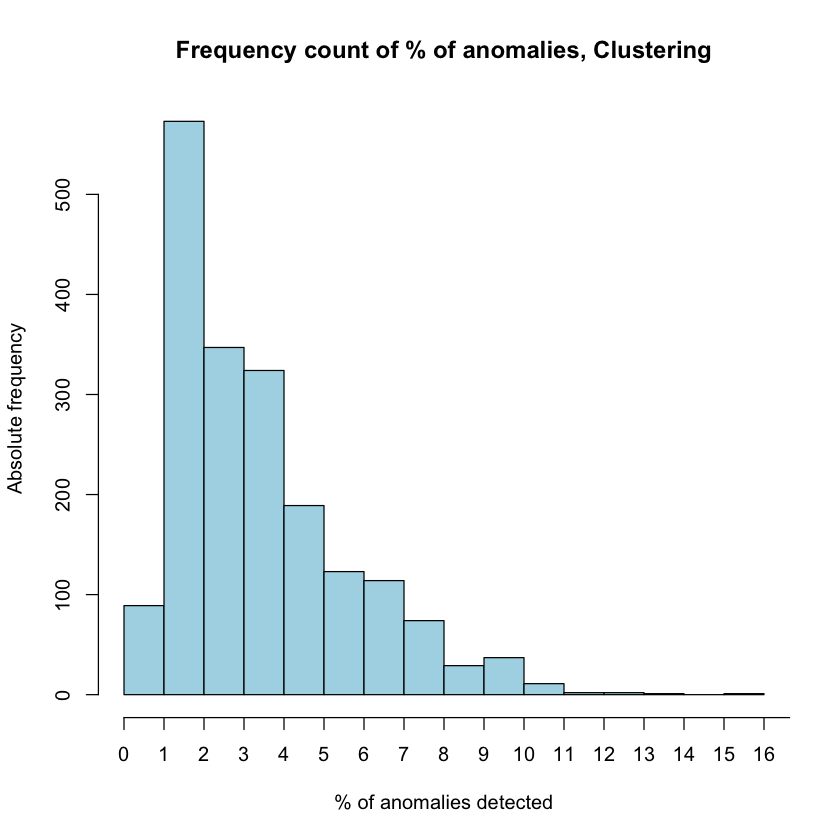

In [217]:
hist(summary_clustering$anom_perc,
      main="Frequency count of % of anomalies, Clustering",
      xlab="% of anomalies detected",
      ylab="Absolute frequency",
#       breaks=1000,
      col="lightblue",
      freq=TRUE,                            # freq=FALSE means to plot density, not counts
      xaxt="n")                              # xaxt="n" means "x axis tick marks == no"
axis(side=1, at=seq(0, 20, by=1))                        

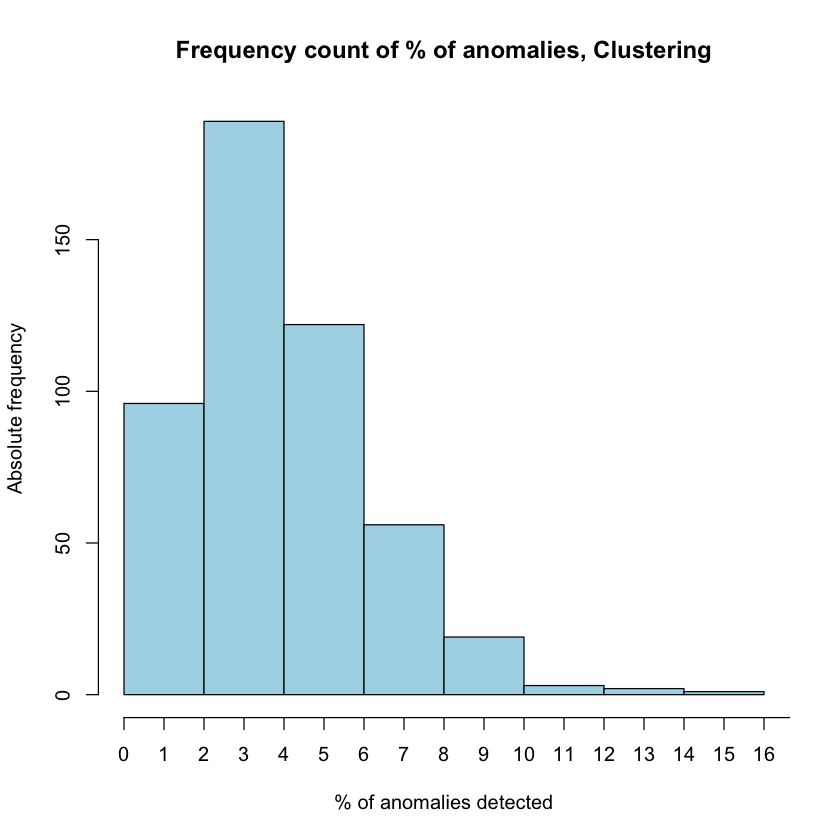

In [229]:
hist(filter(summary_clustering, na_perc == 0)$anom_perc,
      main="Frequency count of % of anomalies, Clustering",
      xlab="% of anomalies detected",
      ylab="Absolute frequency",
#       breaks=1000,
      col="lightblue",
      freq=TRUE,                            # freq=FALSE means to plot density, not counts
      xaxt="n")                              # xaxt="n" means "x axis tick marks == no"
axis(side=1, at=seq(0, 20, by=1))                        

In [179]:
filter(summary_clustering, is.na(anomalies))

account                                   points anomalies anom_perc
1 16.0 - BROWNSVILLE BLD 05_8125869         NA     NA        0        
2 200.0 - BLD 04 - Community Center_8632495 NA     NA        0        
3 279.0 - BLD 01_3552903                    NA     NA        0

## Consider the case of level shifts
- Twitter + GESD is better than STL + IQR
- Should consider change level detection prior to decomposition

#### Level shift in the middle
- STL + IQR will bypass the middle level shift (can't detect the level change)
- Twitter + GESD treats all points at the shifted level as outliers

In [ ]:
ts =  select(filter(tb, Building_Meter == '165.0 - BLD 03_90327795'), 'Building_Meter', 'Month', 'Imputed_KWH')

idx_outliers <- seq(50, 70)
ts$Imputed_KWH[idx_outliers] <- ts$Imputed_KWH[idx_outliers] + mean(ts$Imputed_KWH)/2

ts_anomalized_twitter <- ts %>%
    time_decompose(Imputed_KWH, method = "Twitter", merge = TRUE) %>%
    anomalize(remainder, method = 'gesd', max_anoms = 20/nrow(ts) + (nrow(ts) - 20)/nrow(ts)) %>%
    time_recompose()

ts_anomalized_stl <- ts %>%
    time_decompose(Imputed_KWH, method = "STL", merge = TRUE) %>%
    anomalize(remainder, method = 'iqr', max_anoms = 20/nrow(ts) + (nrow(ts) - 20)/nrow(ts)) %>%
    time_recompose()

# ts_anomalized %>% glimpse()

In [ ]:
ts_anomalized_stl %>%
    plot_anomalies(alpha_dots = 1) + geom_line()

In [ ]:
ts_anomalized_twitter %>%
    plot_anomalies(alpha_dots = 1) + geom_line()

#### Level shift in the end
- neither method perform well
- need to apply the decomposition on the two levels separately

In [ ]:
ts =  select(filter(tb, Building_Meter == '165.0 - BLD 03_90327795'), 'Building_Meter', 'Month', 'Imputed_KWH')

idx_outliers <- seq(50, length(ts))
ts$Imputed_KWH[idx_outliers] <- ts$Imputed_KWH[idx_outliers] + mean(ts$Imputed_KWH)/2

ts_anomalized_twitter <- ts %>%
    time_decompose(Imputed_KWH, method = "Twitter", merge = TRUE) %>%
    anomalize(remainder, method = 'gesd') %>%
    time_recompose()

ts_anomalized_stl <- ts %>%
    time_decompose(Imputed_KWH, method = "STL", merge = TRUE) %>%
    anomalize(remainder, method = 'iqr') %>%
    time_recompose()

# ts_anomalized %>% glimpse()

In [ ]:
ts_anomalized_twitter %>%
    plot_anomaly_decomposition(alpha_dot = 0.5)

In [ ]:
ts_anomalized_stl %>%
    plot_anomaly_decomposition(alpha_dot = 0.5)

## Testing the Anomalize package

#### Test 1 - Test the IQR test function (No issue)

In [ ]:
ts =  select(filter(tb, Building_Meter == '165.0 - BLD 03_90327795'), 'Building_Meter', 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, method = "STL", merge = TRUE) %>%
    anomalize(remainder, method = 'iqr') %>%
    time_recompose()

In [ ]:
filter(ts_anomalized, anomaly == 'Yes')

In [ ]:
outliers <- iqr(ts_anomalized$remainder, alpha = 0.05, max_anoms = 0.2, verbose = TRUE)$outlier_report


outliers

In [ ]:
# ploting function for anomaly plots
ggsetup <- function(data) {
    data %>%
        ggplot(aes(rank, value, color = outlier)) +
        geom_point() +
        geom_line(aes(y = limit_upper), color = "red", linetype = 2) +
        geom_line(aes(y = limit_lower), color = "red", linetype = 2) +
        geom_text(aes(label = index), vjust = -1.25) +
        theme_bw() +
        scale_color_manual(values = c("No" = "#2c3e50", "Yes" = "#e31a1c")) +
        expand_limits(y = 13) +
        theme(legend.position = "bottom")
}

p4 <- outliers %>% 
    ggsetup() +
    ggtitle("Top outlers sorted by rank") 

p4

#### End of test 1

#### Test 2-  Test the GESD function
- remainder_l1, remainder_l2, recomposed_l1, recomposed_l2 values are incorrect in the time_recompose returned tibble (they should vary however in the ts_anomalize tibble they remain constant as the bounds for the first non-anomaly data point)
- some remainder values fall within its reminder range but were still labeled as an anomaly (when STL + GESD is applied)

In [ ]:
ts =  select(filter(tb, Building_Meter == '165.0 - BLD 03_90327795'), 'Building_Meter', 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, method = "STL", merge = TRUE) %>%
    anomalize(remainder, method = 'gesd') %>%
    time_recompose()

In [ ]:
ts_anomalized

In [ ]:
outliers <- anomalize::gesd(ts_anomalized$remainder, alpha = 0.05, max_anoms = 0.2, verbose = TRUE)$outlier_report

In [ ]:
filter(ts_anomalized, anomaly == 'Yes')

In [ ]:
outliers

In [ ]:
p4 <- outliers %>% 
    ggsetup() +
    ggtitle("Top outlers sorted by rank") 

p4

#### End of test2

## Conclusions
- The Twitter decomposition method works bette when a long-term trend is less dominant that the short-term seasonal component.
- Check the characteristics of the time series to decide which decomposition algorithm to apply
- Perform level-change, variance-change detections before applying the decomposition algorithm (need to learn the ecp or changepoint packages though)

In [ ]:
findme

In [526]:
set.seed(1)
sample <- data.frame(Month = seq(ISOdate(2000,1,1), by = "month", length = 5), Value = c(rnorm(5, 2000, 500)))
sample[3, 'Value']<- 20000
sample <- as_tibble(sample)

In [527]:
sample

Month               Value    
1 2000-01-01 12:00:00  1686.773
2 2000-02-01 12:00:00  2091.822
3 2000-03-01 12:00:00 20000.000
4 2000-04-01 12:00:00  2797.640
5 2000-05-01 12:00:00  2164.754

In [528]:
outliers <- iqr(sample$Value, verbose = TRUE)$outlier_report
outliers

rank index value limit_lower limit_upper outlier direction
1 1    3     20000 -25.63455   4915.097    Yes     Up

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


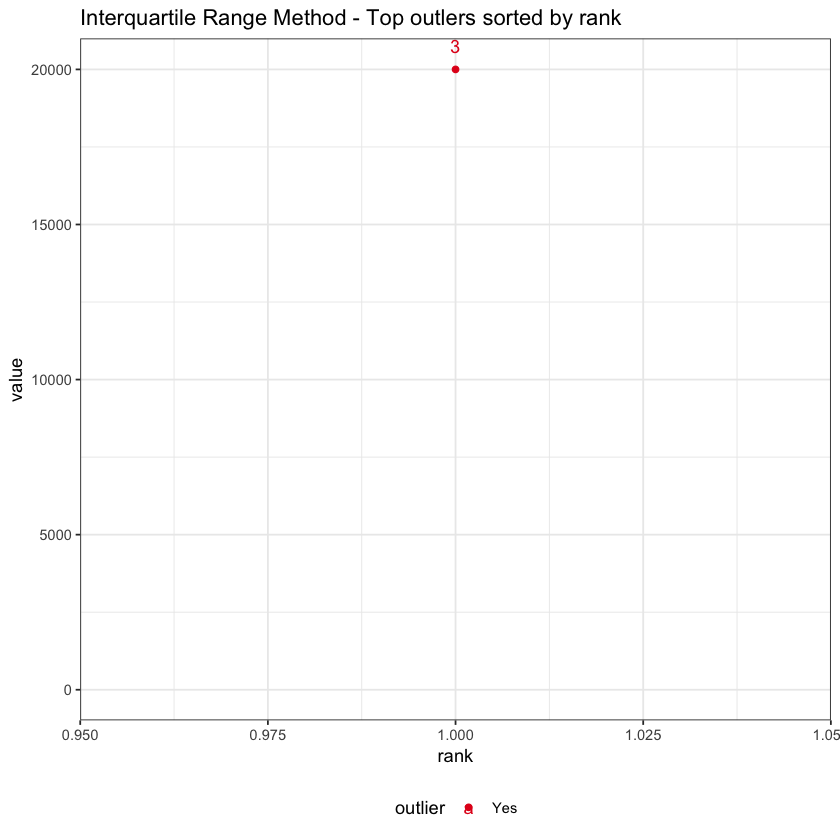

In [463]:
outliers <- iqr(sample$Value, verbose = TRUE)$outlier_report
outliers %>% 
    ggsetup() +
    ggtitle("Interquartile Range Method - Top outlers sorted by rank") 

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


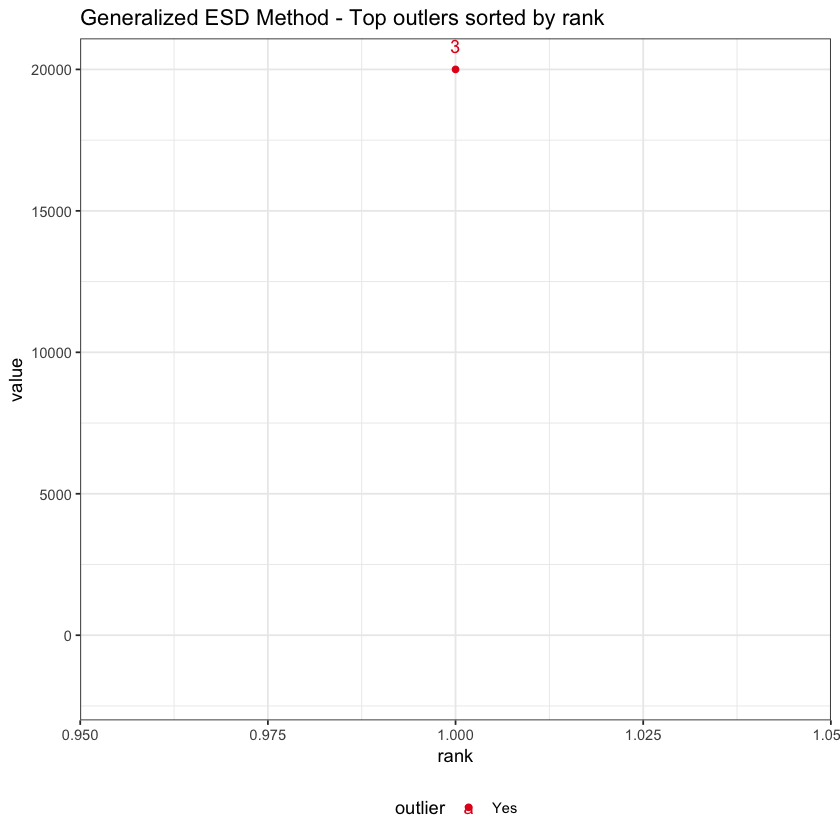

In [454]:
outliers <- gesd(sample$Value, alpha = 0.05, max_anoms = 0.2, verbose = TRUE)$outlier_report
outliers %>% 
    ggsetup() +
    ggtitle("Generalized ESD Method - Top outlers sorted by rank") 

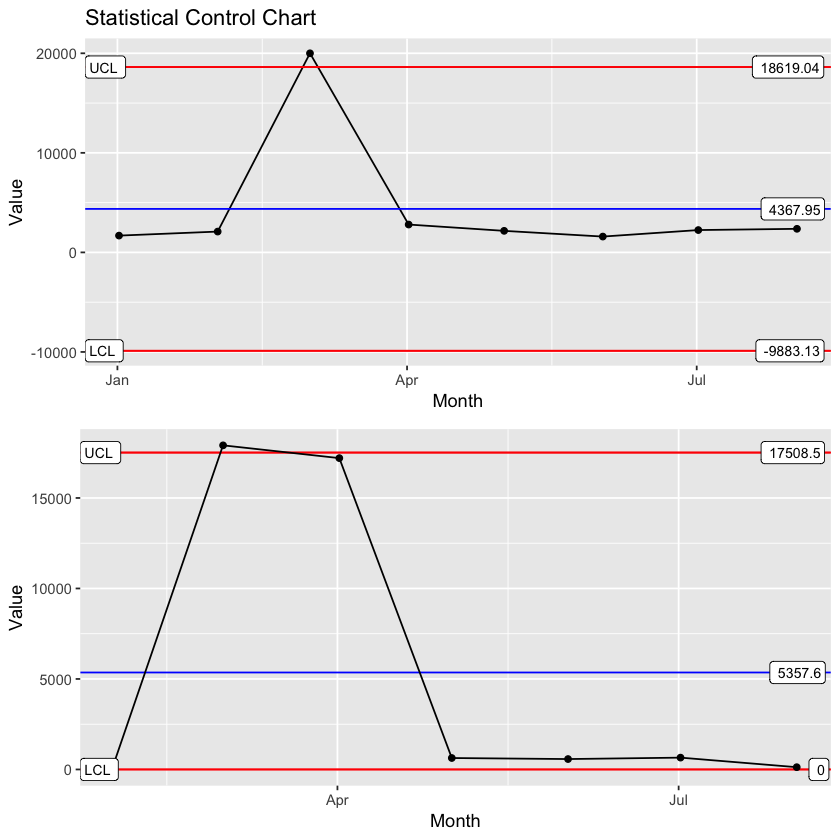

In [525]:
x_Plot <- ggplot(sample, aes(x = Month, y = Value)) + geom_point() + geom_line() + 
  stat_QC(method = 'XmR', auto.label = T, label.digits = 2, show.1n2.sigma = F) +
  ggtitle("Statistical Control Chart") 

mR_Plot <- ggplot(sample, aes(x = Month, y = Value)) + stat_mR() + stat_QC_labels(method="mR")

grid.arrange(x_Plot, mR_Plot, nrow=2)

In [461]:
QC_Lines(data = sample$Value, method = "XmR")     

xBar_one_LCL mean     xBar_one_UCL mR_LCL mR       mR_UCL   sigma   
1 -9475.313    4261.795 17998.9      0      5164.327 16877.02 4579.036